In [89]:
import pandas as pd
import numpy as np
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from pandas_datareader import data
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import scipy.stats
from scipy.stats import norm
import pyfolio as pf
%matplotlib inline

In [90]:
import csv
df = pd.read_csv('Final_stock_data_V2.csv')
df

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,beta,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y
0,AAP,Advance Auto Parts Inc.,Consumer Cyclical,Increase,Above Fair Price,UnderValued,Sustainable,214.1500,0.103398,1.308405e+10,...,1.25,9.550,0.1525,13.932986,22.424082,109.188247,12.97,0.171149,0.355467,0.049267
1,ABT,Abbott Laboratories,Healthcare,Increase,Above Fair Price,OverValued,Average,118.2900,0.181179,2.091710e+11,...,0.74,3.940,0.1318,22.924420,30.022842,51.234756,25.96,0.109154,0.249769,0.247649
2,ACN,Accenture plc,Technology,Increase,Above Fair Price,OverValued,Sustainable,323.9050,0.208836,2.047083e+11,...,1.21,9.613,0.1135,31.025385,33.694477,121.148794,9.45,0.166287,0.254874,0.245322
3,ADM,Archer-Daniels-Midland Company,Consumer Defensive,Increase,Above Fair Price,OverValued,Not Sustainable,76.9850,0.122815,4.327843e+10,...,0.81,4.790,0.0660,14.804809,16.072025,19.449588,36.42,0.117663,0.252289,0.150693
4,ADP,"Automatic Data Processing, Inc.",Industrials,Increase,Above Fair Price,OverValued,Sustainable,201.0100,0.182708,8.443324e+10,...,0.83,6.460,0.1371,26.483530,31.116098,90.801919,14.18,0.120094,0.272415,0.178939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
933,XRX,Xerox Holdings Corporation,Technology,Increase,Above Fair Price,UnderValued,No Data,20.6059,0.029031,3.678401e+09,...,1.75,1.459,-0.1600,10.302950,14.123303,0.609810,999.00,0.231929,0.405374,-0.032851
934,ZD,"Ziff Davis, Inc.",Communication Services,Increase,Above Fair Price,OverValued,No Data,102.4800,0.145864,4.941668e+09,...,1.01,4.120,0.1140,14.193907,24.873789,38.485339,999.00,0.141975,0.308007,0.055993
935,ZUMZ,Zumiez Inc.,Consumer Cyclical,Decrease,Above Fair Price,UnderValued,No Data,42.6600,0.035214,9.777245e+08,...,1.68,4.870,0.1500,9.233767,8.759754,21.330001,999.00,0.223419,0.513665,0.157523
936,ESNT,Essent Group Ltd.,Financial Services,Increase,Above Fair Price,UnderValued,No Data,44.4800,0.082041,4.912015e+09,...,1.33,5.569,0.1555,7.339934,7.987071,23.215807,999.00,0.180874,0.502764,0.045034


<AxesSubplot:>

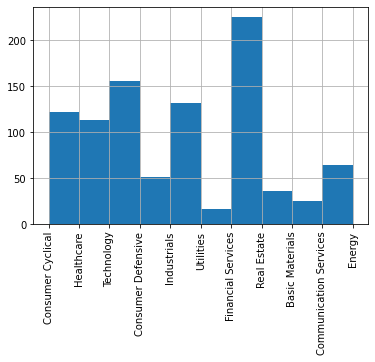

In [91]:
df['sector'].hist(xrot=90)

## Filter based on 2/3 criteria

In [92]:
def check_criteria(each):
    check = []
    if each["capm_status"] == "UnderValued":
        check.append(True)
    if each["Earnings_expectation"] == "Increase":
        check.append(True)
    if each["irv_status"] == "Below Fair Price":
        check.append(True)
    return check

In [93]:
def check_number(criteria):
    if len(criteria) >= 2:
        return True
    else:
        return False

In [94]:
rows = []
for i in range(938):
    each = df.iloc[i]
    criteria = check_criteria(each)
    result = check_number(criteria)
    if result:
        rows.append(i)

In [95]:
len(rows)

476

In [96]:
df = df.iloc[rows]
df

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,beta,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y
0,AAP,Advance Auto Parts Inc.,Consumer Cyclical,Increase,Above Fair Price,UnderValued,Sustainable,214.1500,0.103398,1.308405e+10,...,1.25,9.550,0.1525,13.932986,22.424082,109.188247,12.97,0.171149,0.355467,0.049267
5,ADSK,"Autodesk, Inc.",Technology,Increase,Below Fair Price,UnderValued,Sustainable,217.3800,0.190997,4.781773e+10,...,1.43,5.928,0.2883,31.967648,36.670040,302.038344,15.45,0.193030,0.384894,0.209161
11,ALK,"Alaska Air Group, Inc.",Industrials,Increase,Above Fair Price,UnderValued,No Data,58.9750,0.141697,7.425660e+09,...,1.55,3.770,-0.2340,9.073076,15.643236,0.761055,999.00,0.207617,0.454054,-0.086043
12,ALLE,Allegion plc,Industrials,Increase,Above Fair Price,UnderValued,Average,114.1447,0.097180,1.023831e+10,...,1.14,5.086,0.0777,19.955368,22.442923,31.814578,23.59,0.157777,0.279213,0.118004
14,AMD,"Advanced Micro Devices, Inc.",Technology,Increase,Below Fair Price,OverValued,No Data,117.1100,0.319034,1.414232e+11,...,1.95,3.242,0.3532,35.062874,36.122765,253.245268,999.00,0.256240,0.564107,0.569607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,XOMA,XOMA Corporation,Healthcare,Increase,Above Fair Price,UnderValued,No Data,20.7600,-0.034853,2.348205e+08,...,0.81,0.082,0.1900,-90.260870,253.170730,14.120154,999.00,0.117663,0.689078,0.371572
932,XP,XP Inc.,Financial Services,Increase,Above Fair Price,UnderValued,No Data,34.1100,-0.001020,1.908622e+10,...,1.91,0.986,0.0478,27.508064,34.594322,7.380346,999.00,0.251378,NaN,NaN
933,XRX,Xerox Holdings Corporation,Technology,Increase,Above Fair Price,UnderValued,No Data,20.6059,0.029031,3.678401e+09,...,1.75,1.459,-0.1600,10.302950,14.123303,0.609810,999.00,0.231929,0.405374,-0.032851
936,ESNT,Essent Group Ltd.,Financial Services,Increase,Above Fair Price,UnderValued,No Data,44.4800,0.082041,4.912015e+09,...,1.33,5.569,0.1555,7.339934,7.987071,23.215807,999.00,0.180874,0.502764,0.045034


In [97]:
#total number of stocks for each sector 

df["sector"].value_counts()

Industrials               93
Technology                89
Consumer Cyclical         79
Financial Services        68
Healthcare                52
Communication Services    29
Basic Materials           20
Consumer Defensive        19
Energy                    15
Real Estate               11
Utilities                  1
Name: sector, dtype: int64

In [98]:
#df for each sector

df_BM = df.loc[df['sector'] == 'Basic Materials']
df_CS = df.loc[df['sector'] == 'Communication Services']
df_CC = df.loc[df['sector'] == 'Consumer Cyclical']
df_CD = df.loc[df['sector'] == 'Consumer Defensive']
df_energy = df.loc[df['sector'] == 'Energy']
df_FS = df.loc[df['sector'] == 'Financial Services']
df_healthcare = df.loc[df['sector'] == 'Healthcare']
df_industrials = df.loc[df['sector'] == 'Industrials']
df_RE = df.loc[df['sector'] == 'Real Estate']
df_tech = df.loc[df['sector'] == 'Technology']
df_utilities = df.loc[df['sector'] == 'Utilities']

## Helper Functions

In [99]:
def get_closeprice(ticker):    
    start_date = str(date.today().year - 5) +'-0'+ str(date.today().month) +'-'+ str(date.today().day)
    end_date = str(date.today())
    
    panel_data = data.DataReader([ticker],'yahoo', start_date, end_date)
    closes = panel_data[["Close", "Adj Close"]]
    
    return closes

In [100]:
def get_sharpe_ratio(ticker):
    
    closes = get_closeprice(ticker)
    adj_close = closes["Adj Close"]
    
    risk_free_ann_ret_rate = 0.0195  #assuming this rate based on the latest data
     
    #Rp
    returns_ts = adj_close.pct_change().dropna()
    
    #Average Rp
    avg_daily_ret = returns_ts.mean()

    #Average risk-free rate for the year (Annual rate / number of trading days to spread it out)
    returns_ts['RiskFree_Rate'] = risk_free_ann_ret_rate/252

    #Average Rf
    avg_rf_ret = returns_ts['RiskFree_Rate'].mean()

    #calculate sharpe ratio

    #Add the excess return columns for each ETF: Rp - Rf
    returns_ts['Excess_ret'] = returns_ts[ticker] - returns_ts['RiskFree_Rate']
    
    sharpe = ((avg_daily_ret[ticker] - avg_rf_ret) /returns_ts['Excess_ret'].std())*np.sqrt(252)

    return sharpe.round(3)

In [101]:
def get_return_series(ticker):
    closes = get_closeprice(ticker)
    return_series_close = (closes['Close'].pct_change()+ 1).cumprod() - 1
    return return_series_close

# Basic Materials

## Filtering Stocks based on Sharpe Ratio

In [102]:
sharpe_list = []
for i in range(len(df_BM)):
    each = df_BM.iloc[i]
    ticker = each["ticker"]
    sharpe = get_sharpe_ratio(ticker)
    sharpe_list.append(sharpe)

In [103]:
sharpe_list

[0.462,
 0.826,
 0.776,
 0.131,
 0.462,
 0.728,
 0.288,
 0.458,
 0.415,
 0.416,
 0.35,
 0.347,
 0.488,
 0.41,
 0.417,
 0.329,
 0.687,
 0.51,
 0.674,
 0.64]

In [104]:
df_BM["sharpe"] = sharpe_list
df_BM

C:\Users\LAVANY~1\AppData\Local\Temp/ipykernel_25984/295372314.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_BM["sharpe"] = sharpe_list


,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
42,CE,Celanese Corporation Celanese C,Basic Materials,Decrease,Below Fair Price,UnderValued,Not Sustainable,142.8600,0.133471,1.555331e+10,...,24.792,0.2942,9.058972,5.762343,206.829589,30.53,0.173580,0.326016,0.120412,0.462
58,CTVA,"Corteva, Inc.",Basic Materials,Increase,Below Fair Price,UnderValued,No Data,50.7850,0.061890,3.701765e+10,...,2.202,0.2487,19.608109,23.063126,53.278002,999.00,0.115232,NaN,NaN,0.826
82,FCX,"Freeport-McMoRan, Inc.",Basic Materials,Increase,Below Fair Price,UnderValued,Not Sustainable,42.7400,0.018945,6.276241e+10,...,2.641,0.2890,12.039437,16.183264,59.676070,34.50,0.270827,0.507643,0.234986,0.776
103,IFF,International Flavors & Fragran,Basic Materials,Increase,Above Fair Price,UnderValued,Average,134.7700,0.111741,3.430530e+10,...,1.167,0.0449,25.476372,115.484146,28.441679,22.82,0.145622,0.293892,0.051737,0.131
129,LYB,LyondellBasell Industries NV,Basic Materials,Decrease,Below Fair Price,UnderValued,Average,100.5900,0.160340,3.347474e+10,...,17.121,0.4701,6.613412,5.875241,458.528308,24.89,0.197892,0.398685,0.086687,0.462
157,NUE,Nucor Corporation,Basic Materials,Increase,Below Fair Price,UnderValued,Not Sustainable,122.6400,0.142526,3.505039e+10,...,16.577,0.3499,7.334929,7.398202,259.439419,36.58,0.194245,0.360322,0.193174,0.728
170,PPG,"PPG Industries, Inc.",Basic Materials,Increase,Above Fair Price,UnderValued,Average,146.9600,0.140960,3.488845e+10,...,5.951,0.1660,17.878345,24.695010,83.210006,24.51,0.158993,0.273559,0.082631,0.288
271,BCPC,Balchem Corporation,Basic Materials,Increase,Below Fair Price,OverValued,No Data,139.9900,0.152557,4.533101e+09,...,2.860,0.2400,33.410503,48.947556,137.905521,999.00,0.094567,0.285427,0.108634,0.458
507,HDSN,"Hudson Technologies, Inc.",Basic Materials,Decrease,Below Fair Price,UnderValued,No Data,4.1800,0.034418,1.837933e+08,...,0.468,0.3000,16.720000,8.931623,6.300222,999.00,0.161424,0.900131,-0.122668,0.415
557,IOSP,Innospec Inc.,Basic Materials,Increase,Above Fair Price,UnderValued,No Data,97.4500,0.143631,2.401889e+09,...,3.688,0.0750,18.849129,26.423534,26.555069,999.00,0.183305,0.351408,0.076989,0.416


In [105]:
df_BM = df_BM[df_BM["sharpe"] > 0.6]
df_BM

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
58,CTVA,"Corteva, Inc.",Basic Materials,Increase,Below Fair Price,UnderValued,No Data,50.785,0.061890,3.701765e+10,...,2.202,0.2487,19.608109,23.063126,53.278002,999.00,0.115232,NaN,NaN,0.826
82,FCX,"Freeport-McMoRan, Inc.",Basic Materials,Increase,Below Fair Price,UnderValued,Not Sustainable,42.740,0.018945,6.276241e+10,...,2.641,0.2890,12.039437,16.183264,59.676070,34.50,0.270827,0.507643,0.234986,0.776
157,NUE,Nucor Corporation,Basic Materials,Increase,Below Fair Price,UnderValued,Not Sustainable,122.640,0.142526,3.505039e+10,...,16.577,0.3499,7.334929,7.398202,259.439419,36.58,0.194245,0.360322,0.193174,0.728
809,SCHN,"Schnitzer Steel Industries, Inc",Basic Materials,Increase,Above Fair Price,UnderValued,No Data,41.580,0.019844,1.156909e+09,...,5.657,0.1000,5.766991,7.350186,13.935037,999.00,0.203970,0.472387,0.156052,0.687
855,STLD,"Steel Dynamics, Inc.",Basic Materials,Increase,Below Fair Price,UnderValued,Not Sustainable,63.230,0.186302,1.254806e+10,...,11.005,0.3632,5.062450,5.745570,146.099525,34.29,0.202754,0.411506,0.159118,0.674
878,TGLS,Tecnoglass Inc.,Basic Materials,Increase,Above Fair Price,UnderValued,No Data,19.490,0.099058,9.291818e+08,...,1.404,0.0094,10.708791,13.881765,3.013498,999.00,0.230713,0.620494,0.151889,0.640


# Consumer Defensive

## Filtering Stocks based on Sharpe Ratio

In [106]:
sharpe_list = []
for i in range(len(df_CD)):
    each = df_CD.iloc[i]
    ticker = each["ticker"]
    sharpe = get_sharpe_ratio(ticker)
    sharpe_list.append(sharpe)

In [107]:
sharpe_list

[0.027,
 0.136,
 0.053,
 -0.328,
 0.437,
 0.34,
 1.073,
 0.198,
 0.291,
 0.062,
 0.125,
 0.313,
 0.298,
 0.039,
 0.756,
 0.305,
 0.2,
 0.109,
 0.285]

In [108]:
df_CD["sharpe"] = sharpe_list
df_CD

C:\Users\LAVANY~1\AppData\Local\Temp/ipykernel_25984/4153434586.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CD["sharpe"] = sharpe_list


,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
36,CAG,"ConAgra Brands, Inc.",Consumer Defensive,Increase,Above Fair Price,UnderValued,Not Sustainable,35.7000,0.090652,1.712493e+10,...,2.481,0.0224,13.522727,14.389359,6.193629,32.92,0.115232,0.287178,0.000833,0.027
46,CL,Colgate-Palmolive Company,Consumer Defensive,Increase,Above Fair Price,UnderValued,Average,79.0900,0.078620,6.666093e+10,...,3.140,0.0612,23.330381,25.187897,19.186076,22.12,0.094567,0.206239,0.051918,0.136
117,K,Kellogg Company,Consumer Defensive,Increase,Above Fair Price,UnderValued,Average,66.3900,0.056187,2.264716e+10,...,3.668,0.0315,15.959135,18.099781,12.474271,26.78,0.090920,0.233473,0.006971,0.053
119,KHC,The Kraft Heinz Company,Consumer Defensive,Increase,Above Fair Price,UnderValued,Not Sustainable,39.7900,-0.035146,4.870455e+10,...,1.858,-0.0244,15.071969,21.415500,4.528032,34.47,0.150484,0.322340,-0.118555,-0.328
191,SYY,Sysco Corporation,Consumer Defensive,Increase,Below Fair Price,UnderValued,Sustainable,84.0500,0.143456,4.308874e+10,...,1.332,0.5309,19.964370,63.100600,551.757903,12.14,0.182089,0.361481,0.130098,0.437
306,CCEP,Coca-Cola Europacific Partners,Consumer Defensive,Increase,Below Fair Price,OverValued,No Data,54.0900,0.128504,2.491753e+10,...,1.515,0.3135,20.258427,35.702972,89.469938,999.00,0.109154,0.295493,0.110419,0.340
312,CELH,"Celsius Holdings, Inc.",Consumer Defensive,Increase,Below Fair Price,OverValued,No Data,55.8575,0.717423,4.178984e+09,...,0.110,0.6720,146.993420,507.795440,810.769459,999.00,0.262318,0.729476,0.799096,1.073
388,DTEA,DAVIDsTEA Inc.,Consumer Defensive,Increase,Above Fair Price,UnderValued,No Data,3.0500,-0.195930,8.039800e+07,...,1.431,-1.3172,-101.666664,2.131377,-0.000014,999.00,0.421561,0.875885,-0.151658,0.198
438,FIZZ,National Beverage Corp.,Consumer Defensive,Increase,Below Fair Price,OverValued,No Data,42.3300,0.219583,3.950329e+09,...,1.800,0.2556,22.162306,23.516668,46.665884,999.00,0.135897,0.463844,0.137329,0.291
500,HAIN,"The Hain Celestial Group, Inc.",Consumer Defensive,Increase,Above Fair Price,UnderValued,No Data,36.0000,0.058080,3.343734e+09,...,0.962,0.1300,19.459460,37.422035,15.370851,999.00,0.099429,0.344834,-0.020295,0.062


In [109]:
df_CD = df_CD[df_CD["sharpe"] > 0.6]
df_CD

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
312,CELH,"Celsius Holdings, Inc.",Consumer Defensive,Increase,Below Fair Price,OverValued,No Data,55.8575,0.717423,4.178984e+09,...,0.11,0.6720,146.993420,507.79544,810.769459,999.0,0.262318,0.729476,0.799096,1.073
835,SMPL,The Simply Good Foods Company,Consumer Defensive,Increase,Above Fair Price,UnderValued,No Data,38.1200,0.121790,3.660747e+09,...,0.42,0.0918,24.593548,90.76190,11.943459,999.0,0.148053,NaN,NaN,0.756


# Real Estate Sector

## Filtering Stocks based on Sharpe Ratio

In [110]:
sharpe_list = []
for i in range(len(df_RE)):
    each = df_RE.iloc[i]
    ticker = each["ticker"]
    sharpe = get_sharpe_ratio(ticker)
    sharpe_list.append(sharpe)

In [111]:
sharpe_list

[0.181, 0.664, 0.555, 0.82, 0.352, 0.782, 0.365, 0.448, -0.067, 0.167, 0.748]

In [112]:
df_RE["sharpe"] = sharpe_list
df_RE

C:\Users\LAVANY~1\AppData\Local\Temp/ipykernel_25984/483777690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_RE["sharpe"] = sharpe_list


,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
35,BXP,"Boston Properties, Inc.",Real Estate,Increase,Above Fair Price,UnderValued,Sustainable,121.005,0.052115,1.890183e+10,...,2.044,0.0700,39.673770,59.200100,31.618901,13.57,0.160209,0.318134,0.015426,0.181
39,CBRE,CBRE Group Inc,Real Estate,Increase,Above Fair Price,UnderValued,Sustainable,99.530,0.182808,3.330930e+10,...,4.290,0.1100,17.647163,23.200466,36.186806,6.99,0.189383,0.351216,0.244065,0.664
74,EQIX,"Equinix, Inc.",Real Estate,Increase,Below Fair Price,OverValued,Sustainable,681.020,0.198920,6.131986e+10,...,4.743,0.3700,88.100910,143.584230,1645.638404,14.71,0.062961,0.272286,0.148163,0.555
184,SBAC,SBA Communications Corporation,Real Estate,Increase,Below Fair Price,OverValued,Sustainable,297.160,0.204253,3.232536e+10,...,2.606,1.8932,74.663315,114.029170,599909.754404,14.52,0.056883,0.267604,0.237268,0.820
365,CTRE,"CareTrust REIT, Inc.",Real Estate,Increase,Above Fair Price,UnderValued,No Data,17.580,0.133822,1.705837e+09,...,0.777,0.1020,17.580000,22.625483,5.988839,999.00,0.154131,0.425892,0.077533,0.352
416,EXPI,"eXp World Holdings, Inc.",Real Estate,Increase,Above Fair Price,UnderValued,No Data,25.150,0.156613,3.710555e+09,...,0.467,0.1000,36.985294,53.854390,8.428719,999.00,0.397249,NaN,NaN,0.782
485,GOOD,Gladstone Commercial Corporatio,Real Estate,Increase,Above Fair Price,UnderValued,No Data,21.090,0.095257,7.859906e+08,...,0.029,0.0600,-2109.000000,727.241400,5.064293,999.00,0.140759,0.386789,0.084844,0.365
581,LAMR,Lamar Advertising Company,Real Estate,Increase,Above Fair Price,UnderValued,Sustainable,109.850,0.167806,1.112110e+10,...,3.689,0.0300,23.422174,29.777718,20.371571,16.28,0.194245,0.413550,0.128521,0.448
614,LSEA,Landsea Homes Corporation,Real Estate,Increase,Below Fair Price,UnderValued,No Data,6.560,-0.037662,3.036040e+08,...,0.531,0.4860,4.315790,12.354049,32.942956,999.00,0.036218,NaN,NaN,-0.067
906,UNIT,Uniti Group Inc.,Real Estate,Increase,Below Fair Price,UnderValued,No Data,11.085,-0.039440,2.616847e+09,...,0.171,0.3400,17.879032,64.824560,21.946654,999.00,0.146837,0.546158,-0.087307,0.167


In [113]:
df_RE = df_RE[df_RE["sharpe"] > 0.6]
df_RE

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
39,CBRE,CBRE Group Inc,Real Estate,Increase,Above Fair Price,UnderValued,Sustainable,99.53,0.182808,3.330930e+10,...,4.290,0.1100,17.647163,23.200466,36.186806,6.99,0.189383,0.351216,0.244065,0.664
184,SBAC,SBA Communications Corporation,Real Estate,Increase,Below Fair Price,OverValued,Sustainable,297.16,0.204253,3.232536e+10,...,2.606,1.8932,74.663315,114.029170,599909.754404,14.52,0.056883,0.267604,0.237268,0.820
416,EXPI,"eXp World Holdings, Inc.",Real Estate,Increase,Above Fair Price,UnderValued,No Data,25.15,0.156613,3.710555e+09,...,0.467,0.1000,36.985294,53.854390,8.428719,999.00,0.397249,NaN,NaN,0.782
937,SAFE,Safehold Inc.,Real Estate,Increase,Below Fair Price,OverValued,No Data,60.47,0.133037,3.420177e+09,...,1.261,0.3690,34.752872,47.954006,145.164511,999.00,-0.016052,NaN,NaN,0.748


# Financial Services

## Filtering Stocks based on Sharpe Ratio

In [114]:
sharpe_list = []
for i in range(len(df_FS)):
    each = df_FS.iloc[i]
    ticker = each["ticker"]
    sharpe = get_sharpe_ratio(ticker)
    sharpe_list.append(sharpe)

In [115]:
sharpe_list

[0.66,
 0.036,
 0.255,
 0.438,
 0.142,
 0.298,
 0.474,
 0.368,
 0.335,
 0.314,
 0.497,
 0.55,
 0.274,
 0.385,
 0.692,
 0.17,
 0.043,
 0.1,
 0.234,
 0.337,
 0.103,
 0.072,
 0.845,
 -0.066,
 0.632,
 0.268,
 0.437,
 0.055,
 0.403,
 0.167,
 0.313,
 0.318,
 0.734,
 -0.04,
 -0.471,
 0.945,
 0.036,
 0.168,
 0.155,
 0.334,
 0.293,
 0.069,
 0.267,
 0.586,
 0.169,
 0.483,
 0.02,
 0.182,
 0.248,
 -0.119,
 0.264,
 0.993,
 0.364,
 0.382,
 0.303,
 0.481,
 0.236,
 0.531,
 0.904,
 0.22,
 0.35,
 1.022,
 0.361,
 0.72,
 0.306,
 0.206,
 0.278,
 0.306]

In [116]:
df_FS["sharpe"] = sharpe_list
df_FS

C:\Users\LAVANY~1\AppData\Local\Temp/ipykernel_25984/3122362208.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_FS["sharpe"] = sharpe_list


,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
26,AXP,American Express Company,Financial Services,Increase,Below Fair Price,UnderValued,Not Sustainable,195.1100,0.155990,1.511236e+11,...,9.573,0.4330,20.176836,20.381280,706.617956,20.34,0.169933,0.343000,0.210121,0.660
28,BEN,"Franklin Resources, Inc.",Financial Services,Increase,Above Fair Price,UnderValued,Sustainable,29.9300,0.009948,1.501872e+10,...,3.570,0.0949,7.876316,8.383754,9.619805,19.51,0.165071,0.345803,-0.016066,0.036
31,BK,The Bank of New York Mellon Cor,Financial Services,Increase,Above Fair Price,UnderValued,Average,55.7400,0.123563,4.603126e+10,...,3.925,0.1356,12.196937,14.201275,24.881978,22.79,0.158993,0.298729,0.053724,0.255
51,COF,Capital One Financial Corporati,Financial Services,Decrease,Below Fair Price,UnderValued,Average,153.6800,0.140197,6.540959e+10,...,26.739,0.4520,7.958571,5.747410,626.622996,23.22,0.219773,0.398322,0.129511,0.438
111,IVZ,Invesco Ltd,Financial Services,Increase,Above Fair Price,UnderValued,Not Sustainable,22.0725,0.030092,1.017999e+10,...,2.530,0.2130,7.911291,8.724308,17.835618,20.28,0.168718,0.427328,-0.024774,0.142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,VCTR,"Victory Capital Holdings, Inc.",Financial Services,Increase,Above Fair Price,UnderValued,No Data,32.2100,0.110286,2.193565e+09,...,3.551,0.1170,6.100378,9.070683,12.392493,999.00,0.150484,NaN,NaN,0.720
915,VLY,Valley National Bancorp,Financial Services,Increase,Above Fair Price,UnderValued,No Data,13.9850,0.063284,5.691251e+09,...,1.110,0.0500,11.654166,12.599098,3.083582,999.00,0.166287,0.360308,0.060302,0.306
922,WAFD,"Washington Federal, Inc.",Financial Services,Increase,Above Fair Price,UnderValued,No Data,35.9200,0.109876,2.342835e+09,...,2.390,0.0700,11.777049,15.029287,9.385982,999.00,0.122525,0.323025,0.026584,0.206
932,XP,XP Inc.,Financial Services,Increase,Above Fair Price,UnderValued,No Data,34.1100,-0.001020,1.908622e+10,...,0.986,0.0478,27.508064,34.594322,7.380346,999.00,0.251378,NaN,NaN,0.278


In [117]:
df_FS = df_FS[df_FS["sharpe"] > 0.6]
df_FS

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
26,AXP,American Express Company,Financial Services,Increase,Below Fair Price,UnderValued,Not Sustainable,195.110,0.155990,1.511236e+11,...,9.573,0.4330,20.176836,20.381280,706.617956,20.34,0.169933,0.343000,0.210121,0.660
197,TROW,"T. Rowe Price Group, Inc.",Financial Services,Increase,Above Fair Price,UnderValued,Sustainable,142.560,0.120724,3.267447e+10,...,13.270,0.1220,10.678651,10.743029,57.098253,16.74,0.167502,0.300412,0.193441,0.692
317,CG,The Carlyle Group Inc.,Financial Services,Decrease,Below Fair Price,UnderValued,No Data,44.830,0.139004,1.598019e+10,...,7.730,0.2826,11.041873,5.799483,59.852092,999.00,0.193030,0.363420,0.276296,0.845
360,CSWC,Capital Southwest Corporation,Financial Services,Increase,Above Fair Price,UnderValued,No Data,24.420,0.082236,5.699872e+08,...,1.740,0.0100,12.652850,14.034483,3.796011,999.00,0.174796,0.330948,0.198592,0.632
464,FUTU,Futu Holdings Limited,Financial Services,Increase,Above Fair Price,UnderValued,No Data,40.520,0.102151,5.943150e+09,...,2.459,0.0903,10.389744,16.478243,12.539291,999.00,0.135897,NaN,NaN,0.734
492,GSHD,"Goosehead Insurance, Inc.",Financial Services,Increase,Below Fair Price,OverValued,No Data,85.540,0.187638,3.194397e+09,...,0.396,0.3410,89.104170,216.010100,170.497371,999.00,0.081195,NaN,NaN,0.945
744,PLMR,"Palomar Holdings, Inc.",Financial Services,Increase,Below Fair Price,OverValued,No Data,56.450,0.115100,1.434694e+09,...,1.043,1.1985,19.532871,54.122726,9627.014851,999.00,0.010691,NaN,NaN,0.993
869,TBBK,"The Bancorp, Inc.",Financial Services,Increase,Above Fair Price,UnderValued,No Data,29.290,0.126627,1.668956e+09,...,1.825,0.1200,13.497696,16.049314,11.544390,999.00,0.177227,0.537796,0.404302,0.904
896,TW,Tradeweb Markets Inc.,Financial Services,Increase,Above Fair Price,UnderValued,No Data,80.965,0.086434,1.883205e+10,...,1.136,0.1994,44.002716,71.272000,59.110294,999.00,0.120094,NaN,NaN,1.022
911,VCTR,"Victory Capital Holdings, Inc.",Financial Services,Increase,Above Fair Price,UnderValued,No Data,32.210,0.110286,2.193565e+09,...,3.551,0.1170,6.100378,9.070683,12.392493,999.00,0.150484,NaN,NaN,0.720


# Consumer Cyclical Sector

## Filtering Stocks based on Sharpe Ratio

In [118]:
sharpe_list = []
for i in range(len(df_CC)):
    each = df_CC.iloc[i]
    ticker = each["ticker"]
    sharpe = get_sharpe_ratio(ticker)
    sharpe_list.append(sharpe)

In [119]:
sharpe_list

[0.342,
 0.458,
 0.626,
 0.429,
 0.401,
 0.096,
 0.715,
 0.417,
 0.48,
 0.59,
 0.496,
 0.149,
 0.312,
 1.232,
 0.174,
 0.258,
 0.176,
 0.005,
 0.294,
 0.149,
 0.132,
 0.216,
 0.065,
 0.112,
 0.858,
 0.22,
 0.894,
 0.442,
 0.407,
 0.149,
 0.447,
 0.488,
 0.527,
 0.448,
 0.29,
 0.067,
 0.3,
 0.775,
 0.722,
 0.341,
 0.624,
 0.371,
 0.71,
 0.16,
 0.389,
 0.357,
 0.52,
 -0.123,
 0.378,
 -0.015,
 0.496,
 0.17,
 0.535,
 0.173,
 0.973,
 0.611,
 0.412,
 0.668,
 0.093,
 0.001,
 0.361,
 0.386,
 0.058,
 0.707,
 0.653,
 0.33,
 0.394,
 0.471,
 0.384,
 0.441,
 0.226,
 0.463,
 0.1,
 0.219,
 0.5,
 0.256,
 0.231,
 0.23,
 0.212]

In [120]:
df_CC["sharpe"] = sharpe_list
df_CC

C:\Users\LAVANY~1\AppData\Local\Temp/ipykernel_25984/3842492468.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CC["sharpe"] = sharpe_list


,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
0,AAP,Advance Auto Parts Inc.,Consumer Cyclical,Increase,Above Fair Price,UnderValued,Sustainable,214.1500,0.103398,1.308405e+10,...,9.550,0.1525,13.932986,22.424082,1.091882e+02,12.97,0.171149,0.355467,0.049267,0.342
21,APTV,Aptiv PLC,Consumer Cyclical,Increase,Below Fair Price,UnderValued,Sustainable,139.9800,0.197323,3.786655e+10,...,2.941,0.4626,30.364424,47.596054,6.093763e+02,13.49,0.274474,0.428095,0.175759,0.458
65,DHI,"D.R. Horton, Inc.",Consumer Cyclical,Increase,Above Fair Price,UnderValued,Average,81.3366,0.204622,2.897055e+10,...,11.410,0.1060,5.326562,7.128537,2.862672e+01,22.55,0.217341,0.370627,0.238886,0.626
80,F,Ford Motor Company,Consumer Cyclical,Increase,Below Fair Price,UnderValued,Average,17.4300,0.074129,6.965446e+10,...,0.713,0.7767,8.758794,24.446003,4.370325e+02,29.57,0.150484,0.375582,0.108521,0.429
91,GPC,Genuine Parts Company,Consumer Cyclical,Increase,Above Fair Price,UnderValued,Sustainable,124.8900,0.103717,1.778708e+10,...,5.609,0.0460,17.202478,22.266000,2.660739e+01,12.53,0.150484,0.294242,0.076618,0.401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
898,TXRH,"Texas Roadhouse, Inc.",Consumer Cyclical,Increase,Below Fair Price,OverValued,No Data,87.7900,0.199828,6.114135e+09,...,3.020,0.8417,24.251383,29.069536,3.041617e+03,999.00,0.145622,0.401041,0.159949,0.500
907,URBN,"Urban Outfitters, Inc.",Consumer Cyclical,Increase,Below Fair Price,UnderValued,No Data,25.3600,-0.015427,2.482336e+09,...,2.987,3.1615,8.128205,8.490124,1.349236e+06,999.00,0.203970,0.503745,0.001591,0.256
910,VC,Visteon Corporation,Consumer Cyclical,Increase,Below Fair Price,UnderValued,No Data,131.3900,0.155275,3.678473e+09,...,0.984,0.9518,30.204597,133.526410,7.676611e+03,999.00,0.268396,0.463500,0.066498,0.231
917,VRA,"Vera Bradley, Inc.",Consumer Cyclical,Increase,Above Fair Price,UnderValued,No Data,7.7900,-0.141295,2.627583e+08,...,0.607,0.1630,10.116883,12.833608,4.309673e+00,999.00,0.240438,0.593731,-0.064284,0.230


In [121]:
df_CC = df_CC[df_CC["sharpe"] > 0.6]
df_CC

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
65,DHI,"D.R. Horton, Inc.",Consumer Cyclical,Increase,Above Fair Price,UnderValued,Average,81.3366,0.204622,2.897055e+10,...,11.410,0.1060,5.326562,7.128537,2.862672e+01,22.55,0.217341,0.370627,0.238886,0.626
98,HLT,Hilton Worldwide Holdings Inc.,Consumer Cyclical,Increase,Below Fair Price,UnderValued,Sustainable,147.9550,0.134492,4.123831e+10,...,0.140,2.7265,34.408140,1056.821400,2.914266e+06,19.95,0.168718,0.314619,0.209851,0.715
199,TSLA,"Tesla, Inc.",Consumer Cyclical,Increase,Below Fair Price,OverValued,Average,806.0500,0.609586,8.094838e+11,...,3.062,0.7295,92.014840,263.242980,1.586122e+04,28.54,0.267181,0.611157,0.739589,1.232
321,CHDN,"Churchill Downs, Incorporated",Consumer Cyclical,Increase,Below Fair Price,OverValued,No Data,214.5100,0.285760,8.204814e+09,...,5.574,2.0990,23.598460,38.484030,8.037688e+05,999.00,0.165071,0.428761,0.357716,0.858
326,CLAR,Clarus Corporation,Consumer Cyclical,Increase,Below Fair Price,UnderValued,No Data,21.4100,0.104810,7.919045e+08,...,0.554,0.3290,13.993464,38.646206,3.935781e+01,999.00,0.122525,0.393534,0.306635,0.894
437,FIVE,"Five Below, Inc.",Consumer Cyclical,Increase,Below Fair Price,OverValued,No Data,159.6400,0.196712,8.943895e+09,...,4.662,0.4612,27.242321,34.242813,6.889982e+02,999.00,0.178443,0.452922,0.332526,0.775
442,FLL,"Full House Resorts, Inc.",Consumer Cyclical,Increase,Above Fair Price,UnderValued,No Data,8.7500,0.119495,2.994906e+08,...,0.331,0.1500,19.444445,26.435045,4.375000e+00,999.00,0.240438,0.704348,0.296359,0.722
447,FNKO,"Funko, Inc.",Consumer Cyclical,Increase,Above Fair Price,UnderValued,No Data,17.1200,0.092467,6.835999e+08,...,1.037,0.0270,11.972029,16.509163,3.092625e+00,999.00,0.293924,NaN,NaN,0.624
452,FOXF,Fox Factory Holding Corp.,Consumer Cyclical,Increase,Above Fair Price,UnderValued,No Data,120.9000,0.205780,5.090374e+09,...,3.731,0.1500,23.613281,32.404182,6.045000e+01,999.00,0.230713,0.462622,0.367678,0.710
616,LULU,lululemon athletica inc.,Consumer Cyclical,Increase,Below Fair Price,UnderValued,Sustainable,304.5800,0.164012,3.938189e+10,...,6.661,0.2790,32.927567,45.725870,3.964841e+02,16.06,0.179658,0.392863,0.361296,0.973


# Technology

## Filtering Stocks based on Sharpe Ratio

In [122]:
sharpe_list = []
for i in range(len(df_tech)):
    each = df_tech.iloc[i]
    ticker = each["ticker"]
    sharpe = get_sharpe_ratio(ticker)
    sharpe_list.append(sharpe)

In [123]:
sharpe_list

[0.599,
 1.012,
 0.762,
 0.415,
 0.762,
 0.39,
 0.165,
 0.43,
 0.597,
 0.56,
 0.53,
 0.733,
 0.472,
 0.068,
 0.196,
 0.517,
 0.702,
 1.373,
 1.046,
 0.087,
 0.481,
 0.803,
 0.146,
 0.374,
 0.133,
 0.479,
 0.289,
 -0.313,
 0.287,
 0.47,
 0.536,
 0.371,
 0.287,
 0.415,
 -0.26,
 0.442,
 0.809,
 0.87,
 0.176,
 -0.085,
 0.491,
 0.372,
 -0.002,
 0.092,
 0.388,
 0.5,
 0.469,
 0.082,
 0.549,
 0.663,
 0.125,
 0.689,
 0.646,
 0.528,
 0.561,
 0.514,
 0.378,
 0.31,
 0.659,
 0.045,
 0.043,
 0.154,
 0.093,
 0.496,
 0.77,
 0.205,
 0.282,
 -0.022,
 0.408,
 0.338,
 0.71,
 0.423,
 0.572,
 0.896,
 0.634,
 0.173,
 0.126,
 0.724,
 1.812,
 0.422,
 0.497,
 0.509,
 1.126,
 0.6,
 -0.103,
 0.052,
 0.684,
 0.033,
 0.087]

In [124]:
df_tech["sharpe"] = sharpe_list
df_tech

C:\Users\LAVANY~1\AppData\Local\Temp/ipykernel_25984/505389931.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tech["sharpe"] = sharpe_list


,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
5,ADSK,"Autodesk, Inc.",Technology,Increase,Below Fair Price,UnderValued,Sustainable,217.3800,0.190997,4.781773e+10,...,5.928,0.2883,31.967648,36.670040,302.038344,15.45,0.193030,0.384894,0.209161,0.599
14,AMD,"Advanced Micro Devices, Inc.",Technology,Increase,Below Fair Price,OverValued,No Data,117.1100,0.319034,1.414232e+11,...,3.242,0.3532,35.062874,36.122765,253.245268,999.00,0.256240,0.564107,0.569607,1.012
17,ANSS,"ANSYS, Inc.",Technology,Increase,Above Fair Price,UnderValued,Sustainable,305.4575,0.163292,2.665208e+10,...,5.318,0.1118,38.470715,57.438416,112.688671,13.16,0.169933,0.316793,0.271663,0.762
57,CTSH,Cognizant Technology Solutions,Technology,Increase,Above Fair Price,UnderValued,Sustainable,85.7600,0.098598,4.556764e+10,...,3.545,0.1398,18.973452,24.191820,39.576018,17.47,0.156562,0.290279,0.115536,0.415
73,EPAM,"EPAM Systems, Inc.",Technology,Increase,Below Fair Price,OverValued,No Data,428.8350,0.408649,2.432335e+10,...,7.211,0.2850,38.391674,59.469560,582.247739,999.00,0.193030,0.376405,0.422642,0.762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,UEIC,Universal Electronics Inc.,Technology,Increase,Above Fair Price,UnderValued,No Data,32.0000,0.045029,4.192544e+08,...,1.707,0.1500,9.090909,18.746338,15.999999,999.00,0.162640,0.491506,-0.118525,-0.103
919,VSAT,"ViaSat, Inc.",Technology,Increase,Below Fair Price,UnderValued,No Data,41.2500,-0.011116,3.029557e+09,...,0.478,0.2460,85.937500,86.297070,42.440039,999.00,0.155346,0.431753,-0.081127,0.052
923,WDAY,"Workday, Inc.",Technology,Increase,Above Fair Price,UnderValued,Sustainable,216.5600,0.160951,5.414000e+10,...,0.117,0.1579,60.831463,1850.940200,115.161464,13.09,0.183305,0.383779,0.213788,0.684
928,WTRH,Waitr Holdings Inc.,Technology,Increase,Above Fair Price,UnderValued,No Data,0.4474,-0.264822,6.456787e+07,...,0.043,0.2000,-5.592500,10.404651,0.328108,999.00,-0.137611,1.128303,-0.461342,0.033


In [125]:
df_tech = df_tech[df_tech["sharpe"] > 0.6]
df_tech

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
14,AMD,"Advanced Micro Devices, Inc.",Technology,Increase,Below Fair Price,OverValued,No Data,117.1100,0.319034,1.414232e+11,...,3.242,0.3532,35.062874,36.122765,253.245268,999.00,0.256240,0.564107,0.569607,1.012
17,ANSS,"ANSYS, Inc.",Technology,Increase,Above Fair Price,UnderValued,Sustainable,305.4575,0.163292,2.665208e+10,...,5.318,0.1118,38.470715,57.438416,112.688671,13.16,0.169933,0.316793,0.271663,0.762
73,EPAM,"EPAM Systems, Inc.",Technology,Increase,Below Fair Price,OverValued,No Data,428.8350,0.408649,2.432335e+10,...,7.211,0.2850,38.391674,59.469560,582.247739,999.00,0.193030,0.376405,0.422642,0.762
176,QCOM,QUALCOMM Incorporated,Technology,Increase,Below Fair Price,UnderValued,Sustainable,165.6500,0.130769,1.855280e+11,...,7.870,0.2562,14.231099,21.048285,183.404501,18.00,0.173580,0.375961,0.297623,0.733
243,AOSL,Alpha and Omega Semiconductor L,Technology,Increase,Above Fair Price,UnderValued,No Data,49.2600,0.165397,1.299356e+09,...,2.612,0.1700,11.617925,18.859112,28.764485,999.00,0.330391,0.570794,0.201750,0.702
244,APPS,"Digital Turbine, Inc.",Technology,Increase,Below Fair Price,UnderValued,No Data,43.8000,0.278657,4.232205e+09,...,0.530,0.5000,20.372091,82.641510,239.323247,999.00,0.285415,0.719036,1.325025,1.373
249,ASML,ASML Holding N.V. - New York Re,Technology,Increase,Below Fair Price,OverValued,No Data,634.7900,0.341963,2.580256e+11,...,15.017,0.2980,32.420326,42.271423,943.608234,999.00,0.134681,0.360669,0.411064,1.046
258,AUDC,AudioCodes Ltd.,Technology,Increase,Below Fair Price,OverValued,No Data,27.6750,0.234188,9.141052e+08,...,1.028,0.2500,16.875000,26.921206,29.306718,999.00,0.084842,0.446357,0.362672,0.803
381,DIOD,Diodes Incorporated,Technology,Increase,Above Fair Price,UnderValued,No Data,87.1300,0.131229,3.922401e+09,...,4.123,0.1500,14.919519,21.132670,43.564999,999.00,0.148053,0.401822,0.286506,0.809
386,DSGX,The Descartes Systems Group Inc,Technology,Increase,Below Fair Price,OverValued,No Data,69.6200,0.240316,5.893862e+09,...,0.980,0.2600,66.942314,71.040820,79.206056,999.00,0.144406,0.291432,0.265617,0.870


# Industrials

## Filtering Stocks based on Sharpe Ratio

In [126]:
sharpe_list = []
for i in range(len(df_industrials)):
    each = df_industrials.iloc[i]
    ticker = each["ticker"]
    sharpe = get_sharpe_ratio(ticker)
    sharpe_list.append(sharpe)

In [127]:
sharpe_list

[-0.007,
 0.389,
 0.764,
 0.734,
 0.376,
 0.397,
 0.479,
 0.255,
 0.344,
 0.624,
 0.333,
 0.731,
 0.743,
 0.492,
 0.732,
 -0.019,
 1.216,
 0.538,
 0.409,
 0.313,
 0.671,
 0.503,
 0.177,
 0.25,
 0.216,
 0.702,
 0.031,
 0.391,
 0.115,
 0.872,
 -0.019,
 0.472,
 0.182,
 -0.338,
 0.313,
 0.239,
 0.345,
 0.208,
 0.445,
 0.628,
 0.556,
 0.334,
 0.477,
 0.297,
 0.6,
 0.001,
 0.752,
 0.534,
 0.353,
 0.218,
 0.68,
 -0.176,
 0.436,
 0.186,
 0.643,
 0.346,
 0.785,
 0.4,
 0.454,
 0.093,
 0.542,
 -0.164,
 0.029,
 0.742,
 0.246,
 0.274,
 0.415,
 0.55,
 0.598,
 0.399,
 0.426,
 0.237,
 0.608,
 0.668,
 0.486,
 0.242,
 0.589,
 0.206,
 0.519,
 1.042,
 0.633,
 0.218,
 0.129,
 -0.094,
 0.502,
 1.008,
 0.38,
 0.221,
 0.442,
 0.631,
 0.376,
 0.289,
 0.485]

In [128]:
df_industrials["sharpe"] = sharpe_list
df_industrials

C:\Users\LAVANY~1\AppData\Local\Temp/ipykernel_25984/77830193.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_industrials["sharpe"] = sharpe_list


,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
11,ALK,"Alaska Air Group, Inc.",Industrials,Increase,Above Fair Price,UnderValued,No Data,58.9750,0.141697,7.425660e+09,...,3.770,-0.2340,9.073076,15.643236,0.761055,999.00,0.207617,0.454054,-0.086043,-0.007
12,ALLE,Allegion plc,Industrials,Increase,Above Fair Price,UnderValued,Average,114.1447,0.097180,1.023831e+10,...,5.086,0.0777,19.955368,22.442923,31.814578,23.59,0.157777,0.279213,0.118004,0.389
15,AME,"AMETEK, Inc.",Industrials,Increase,Above Fair Price,UnderValued,Average,128.2800,0.155568,2.967437e+10,...,3.990,-0.0120,23.799630,32.150375,16.355389,25.95,0.178443,0.269622,0.206944,0.764
37,CAT,"Caterpillar, Inc.",Industrials,Increase,Below Fair Price,UnderValued,Not Sustainable,193.1600,0.084214,1.044884e+11,...,9.348,0.3224,17.721102,20.663244,339.525357,34.28,0.128603,0.314958,0.175801,0.734
45,CHRW,"C.H. Robinson Worldwide, Inc.",Industrials,Increase,Above Fair Price,UnderValued,Sustainable,92.0950,0.055239,1.197115e+10,...,5.646,0.1239,15.222314,16.311548,37.451959,19.83,0.111585,0.262005,0.071573,0.376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904,ULH,"Universal Logistics Holdings, I",Industrials,Increase,Above Fair Price,UnderValued,No Data,18.0900,0.030170,4.869738e+08,...,2.740,0.0300,5.566154,6.602190,3.354772,999.00,0.199108,0.403463,0.069257,0.442
908,USAK,"USA Truck, Inc.",Industrials,Increase,Below Fair Price,UnderValued,No Data,24.0400,0.108008,2.136505e+08,...,2.057,0.2760,9.246155,11.686924,30.639383,999.00,0.273259,0.638308,0.234642,0.631
918,VRRM,Verra Mobility Corporation,Industrials,Increase,Below Fair Price,UnderValued,No Data,17.2700,0.056159,2.695225e+09,...,0.058,0.3080,18.178947,297.758640,27.507524,999.00,0.196676,NaN,NaN,0.376
920,VSEC,VSE Corporation,Industrials,Increase,Above Fair Price,UnderValued,No Data,47.3300,0.148449,6.016543e+08,...,0.633,0.1960,12.198454,74.770935,33.682675,999.00,0.199108,0.472182,0.061138,0.289


In [129]:
df_industrials = df_industrials[df_industrials["sharpe"] > 0.6]
df_industrials

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
15,AME,"AMETEK, Inc.",Industrials,Increase,Above Fair Price,UnderValued,Average,128.28,0.155568,2.967437e+10,...,3.990,-0.0120,23.799630,32.150375,16.355389,25.95,0.178443,0.269622,0.206944,0.764
37,CAT,"Caterpillar, Inc.",Industrials,Increase,Below Fair Price,UnderValued,Not Sustainable,193.16,0.084214,1.044884e+11,...,9.348,0.3224,17.721102,20.663244,339.525357,34.28,0.128603,0.314958,0.175801,0.734
92,GWW,"W.W. Grainger, Inc.",Industrials,Increase,Above Fair Price,UnderValued,Sustainable,474.32,0.106272,2.443697e+10,...,17.495,0.1538,20.304794,27.111746,244.306874,14.60,0.169933,0.317545,0.154030,0.624
107,IR,Ingersoll Rand Inc.,Industrials,Increase,Above Fair Price,UnderValued,No Data,53.31,0.123299,2.172836e+10,...,0.987,0.2177,23.077923,54.012160,44.602674,999.00,0.197892,NaN,NaN,0.731
112,J,Jacobs Engineering Group Inc.,Industrials,Increase,Above Fair Price,UnderValued,Average,120.31,0.101926,1.557449e+10,...,3.196,0.1303,14.636252,37.643930,51.491402,25.36,0.118879,0.291333,0.161099,0.743
125,LHX,"L3Harris Technologies, Inc.",Industrials,Increase,Below Fair Price,OverValued,No Data,220.65,0.203961,4.329704e+10,...,7.514,0.4180,16.129385,29.365185,726.908004,999.00,0.124956,0.273401,0.190286,0.732
158,ODFL,"Old Dominion Freight Line, Inc.",Industrials,Increase,Below Fair Price,OverValued,No Data,287.86,0.310243,3.310706e+10,...,8.087,0.2929,27.974731,35.595398,413.004855,999.00,0.143190,0.298006,0.382658,1.216
207,URI,"United Rentals, Inc.",Industrials,Increase,Above Fair Price,UnderValued,Sustainable,311.82,0.221984,2.257402e+10,...,16.534,0.2123,12.180469,18.859320,250.659605,18.26,0.251378,0.445386,0.191018,0.671
245,ARCB,ArcBest Corporation,Industrials,Increase,Below Fair Price,UnderValued,No Data,85.22,0.173652,2.178930e+09,...,6.407,0.3300,9.532439,13.301077,157.723259,999.00,0.219773,0.506692,0.230508,0.702
297,CAR,"Avis Budget Group, Inc.",Industrials,Increase,Below Fair Price,OverValued,No Data,152.02,0.278948,8.581165e+09,...,11.807,0.2750,7.791902,12.875413,192.389708,999.00,0.270827,0.807664,0.347936,0.872


# Healthcare

## Filtering Stocks based on Sharpe Ratio

In [130]:
sharpe_list = []
for i in range(len(df_healthcare)):
    each = df_healthcare.iloc[i]
    ticker = each["ticker"]
    sharpe = get_sharpe_ratio(ticker)
    sharpe_list.append(sharpe)

In [131]:
sharpe_list

[0.073,
 0.86,
 0.891,
 0.773,
 -0.177,
 -0.02,
 -0.032,
 0.388,
 0.642,
 -0.074,
 0.095,
 0.73,
 0.42,
 0.819,
 0.003,
 0.438,
 0.291,
 0.673,
 0.581,
 0.583,
 0.592,
 0.053,
 0.211,
 0.429,
 0.326,
 0.076,
 0.342,
 0.816,
 -0.07,
 1.21,
 0.121,
 0.086,
 0.936,
 0.636,
 0.331,
 0.725,
 1.122,
 0.392,
 0.064,
 0.397,
 0.072,
 0.987,
 0.206,
 0.426,
 0.932,
 0.176,
 0.569,
 0.324,
 0.436,
 0.443,
 0.921,
 0.719]

In [132]:
df_healthcare["sharpe"] = sharpe_list
df_healthcare

C:\Users\LAVANY~1\AppData\Local\Temp/ipykernel_25984/4048192744.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_healthcare["sharpe"] = sharpe_list


,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
30,BIIB,Biogen Inc.,Healthcare,Increase,Above Fair Price,UnderValued,Not Sustainable,210.0000,0.060577,3.084753e+10,...,10.2170,-0.0650,11.332973,20.553978,1.630096e+01,20.62,0.072686,0.458651,-0.051561,0.073
56,CTLT,"Catalent, Inc.",Healthcare,Increase,Above Fair Price,UnderValued,No Data,97.6100,0.171804,1.670966e+10,...,3.1770,0.1617,23.240477,30.723953,5.346009e+01,999.00,0.182089,0.359504,0.285814,0.860
102,IDXX,"IDEXX Laboratories, Inc.",Healthcare,Increase,Below Fair Price,OverValued,Not Sustainable,489.5600,0.272290,4.151156e+10,...,8.7180,0.2430,52.025505,56.155080,4.928736e+02,20.74,0.133466,0.305168,0.291234,0.891
106,IQV,"IQVIA Holdings, Inc.",Healthcare,Increase,Above Fair Price,UnderValued,Sustainable,226.1600,0.183066,4.320561e+10,...,3.9290,0.2213,22.281775,57.561720,1.943151e+02,19.24,0.189383,0.301323,0.240998,0.773
212,WBA,"Walgreens Boots Alliance, Inc.",Healthcare,Increase,Above Fair Price,UnderValued,Sustainable,46.1800,0.056427,3.989698e+10,...,2.9330,0.0293,9.054902,15.744970,8.511794e+00,18.38,0.086058,0.316630,-0.084159,-0.177
218,XRAY,DENTSPLY SIRONA Inc.,Healthcare,Increase,Below Fair Price,UnderValued,Not Sustainable,55.1800,0.044138,1.206273e+10,...,1.9020,0.2497,17.297806,29.011568,5.830732e+01,20.12,0.129819,0.322027,0.004033,-0.020
230,AGIO,"Agios Pharmaceuticals, Inc.",Healthcare,Increase,Below Fair Price,UnderValued,No Data,29.0000,-0.007540,1.574947e+09,...,24.9500,0.3900,-4.769737,1.162325,7.984002e+01,999.00,0.201539,0.510859,-0.078755,-0.032
255,ATRS,"Antares Pharma, Inc.",Healthcare,Decrease,Below Fair Price,UnderValued,No Data,3.4250,0.024070,5.823939e+08,...,0.3740,0.7890,19.027777,9.157754,9.137830e+01,999.00,0.205186,0.553134,0.087984,0.388
272,BDSI,BioDelivery Sciences Internatio,Healthcare,Increase,Below Fair Price,UnderValued,No Data,5.5600,0.091710,5.493052e+08,...,0.2900,0.2500,16.848484,19.172415,5.887818e+00,999.00,0.121310,0.565891,0.246627,0.642
277,BIOC,"Biocept, Inc.",Healthcare,Increase,Below Fair Price,UnderValued,No Data,2.2600,-0.560788,3.806337e+07,...,0.2190,0.4000,-2.132076,10.319634,6.636669e+00,999.00,0.084842,1.383791,-0.654186,-0.074


In [133]:
df_healthcare = df_healthcare[df_healthcare["sharpe"] > 0.6]
df_healthcare

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
56,CTLT,"Catalent, Inc.",Healthcare,Increase,Above Fair Price,UnderValued,No Data,97.610,0.171804,1.670966e+10,...,3.177,0.1617,23.240477,30.723953,5.346009e+01,999.00,0.182089,0.359504,0.285814,0.860
102,IDXX,"IDEXX Laboratories, Inc.",Healthcare,Increase,Below Fair Price,OverValued,Not Sustainable,489.560,0.272290,4.151156e+10,...,8.718,0.2430,52.025505,56.155080,4.928736e+02,20.74,0.133466,0.305168,0.291234,0.891
106,IQV,"IQVIA Holdings, Inc.",Healthcare,Increase,Above Fair Price,UnderValued,Sustainable,226.160,0.183066,4.320561e+10,...,3.929,0.2213,22.281775,57.561720,1.943151e+02,19.24,0.189383,0.301323,0.240998,0.773
272,BDSI,BioDelivery Sciences Internatio,Healthcare,Increase,Below Fair Price,UnderValued,No Data,5.560,0.091710,5.493052e+08,...,0.290,0.2500,16.848484,19.172415,5.887818e+00,999.00,0.121310,0.565891,0.246627,0.642
287,BRKR,Bruker Corporation,Healthcare,Increase,Above Fair Price,UnderValued,No Data,68.965,0.159607,1.045889e+10,...,1.771,0.2055,30.115719,38.941273,5.270151e+01,999.00,0.168718,0.333862,0.242053,0.730
310,CDMO,"Avid Bioservices, Inc.",Healthcare,Increase,Above Fair Price,UnderValued,No Data,19.645,0.146303,1.209769e+09,...,0.136,0.1500,61.390630,144.448530,9.822500e+00,999.00,0.298786,0.688251,0.654617,0.819
351,CRSP,CRISPR Therapeutics AG,Healthcare,Increase,Above Fair Price,UnderValued,No Data,55.660,0.147264,4.259493e+09,...,5.263,-2.0040,-7.906250,10.575717,-8.200419e+00,999.00,0.272043,0.649606,0.295733,0.673
542,ICLR,ICON plc,Healthcare,Increase,Below Fair Price,OverValued,No Data,220.250,0.264338,1.792787e+10,...,2.939,0.2548,19.152174,74.940460,2.414215e+02,999.00,0.124956,0.296964,0.223068,0.816
554,INMD,InMode Ltd.,Healthcare,Increase,Below Fair Price,UnderValued,No Data,40.900,0.196788,3.124012e+09,...,1.736,0.3320,19.854370,23.559910,7.672746e+01,999.00,0.230713,NaN,NaN,1.210
631,MEDP,"Medpace Holdings, Inc.",Healthcare,Increase,Above Fair Price,UnderValued,No Data,140.030,0.175529,5.032566e+09,...,4.830,0.1421,25.552920,28.991718,6.580331e+01,999.00,0.179658,0.498130,0.345048,0.936


# Communication Services

## Filtering Stocks based on Sharpe Ratio

In [134]:
sharpe_list = []
for i in range(len(df_CS)):
    each = df_CS.iloc[i]
    ticker = each["ticker"]
    sharpe = get_sharpe_ratio(ticker)
    sharpe_list.append(sharpe)

In [135]:
sharpe_list

[0.169,
 0.313,
 0.071,
 0.938,
 0.116,
 0.401,
 0.451,
 -0.001,
 0.487,
 0.5,
 0.003,
 0.01,
 0.396,
 -0.153,
 0.588,
 -0.218,
 -0.011,
 0.285,
 0.656,
 -0.033,
 0.813,
 0.114,
 0.116,
 0.271,
 0.224,
 -0.205,
 1.137,
 0.226,
 -0.297]

In [136]:
df_CS["sharpe"] = sharpe_list
df_CS

C:\Users\LAVANY~1\AppData\Local\Temp/ipykernel_25984/344717606.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CS["sharpe"] = sharpe_list


,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
67,DISCA,"Discovery, Inc. - Series A",Communication Services,Increase,Above Fair Price,UnderValued,Sustainable,29.6600,0.027716,1.475057e+10,...,1.495,0.0354,9.268750,19.839464,5.765461,17.36,0.178443,0.436299,-0.002576,0.169
71,EA,Electronic Arts Inc.,Communication Services,Increase,Below Fair Price,OverValued,Sustainable,128.5400,0.223319,3.635214e+10,...,2.715,0.2701,17.070383,47.344383,157.133571,10.36,0.124956,0.314375,0.095045,0.313
236,AMCX,AMC Networks Inc.,Communication Services,Increase,Above Fair Price,UnderValued,No Data,38.5050,-0.015313,1.626921e+09,...,7.502,-0.1220,4.730344,5.132631,1.696904,999.00,0.152915,0.481496,-0.061080,0.071
259,AVID,"Avid Technology, Inc.",Communication Services,Increase,Above Fair Price,UnderValued,No Data,29.9300,0.097825,1.347508e+09,...,0.717,0.1500,19.690790,41.743374,14.965000,999.00,0.167502,0.613275,0.402675,0.938
276,BIDU,"Baidu, Inc.",Communication Services,Increase,Above Fair Price,UnderValued,Average,152.9950,0.014219,5.402162e+10,...,6.069,0.0169,17.113535,25.209260,25.285463,24.22,0.133466,0.420337,-0.029105,0.116
298,CARG,"CarGurus, Inc.",Communication Services,Increase,Above Fair Price,UnderValued,No Data,32.4150,0.016284,3.814695e+09,...,0.884,0.1940,22.827467,36.668552,22.723457,999.00,0.235575,NaN,NaN,0.401
307,CCOI,"Cogent Communications Holdings,",Communication Services,Increase,Below Fair Price,OverValued,No Data,62.5000,0.173571,2.979612e+09,...,0.481,1.0069,57.339447,129.937620,4691.384428,999.00,0.037434,0.321307,0.117506,0.451
352,CRTO,Criteo S.A.,Communication Services,Increase,Above Fair Price,UnderValued,No Data,31.6500,-0.011107,1.921861e+09,...,1.656,-0.0487,9.921630,19.112318,2.870256,999.00,0.139544,0.539336,-0.065835,-0.001
465,FWONA,Liberty Media Corporation - Ser,Communication Services,Increase,Above Fair Price,UnderValued,No Data,56.6200,0.108724,1.382502e+10,...,0.004,-0.6850,471.833340,14154.999000,0.000246,999.00,0.168718,0.363516,0.136089,0.487
466,FWONK,Liberty Media Corporation - Ser,Communication Services,Increase,Above Fair Price,UnderValued,No Data,61.8700,0.096506,1.418951e+10,...,0.004,-0.6850,515.583300,15467.499000,0.000269,999.00,0.168718,0.371499,0.156119,0.500


In [137]:
df_CS = df_CS[df_CS["sharpe"] > 0.6]
df_CS

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
259,AVID,"Avid Technology, Inc.",Communication Services,Increase,Above Fair Price,UnderValued,No Data,29.93,0.097825,1.347508e+09,...,0.717,0.1500,19.690790,41.743374,14.965000,999.0,0.167502,0.613275,0.402675,0.938
767,QNST,"QuinStreet, Inc.",Communication Services,Increase,Below Fair Price,UnderValued,No Data,10.76,-0.002836,5.836483e+08,...,0.223,0.2500,11.569893,48.251120,11.394409,999.0,0.107938,0.587975,0.269590,0.656
789,ROKU,"Roku, Inc.",Communication Services,Decrease,Below Fair Price,UnderValued,No Data,121.97,0.179013,1.638826e+10,...,2.067,0.4910,73.035934,59.008230,631.308006,999.0,0.228282,NaN,NaN,0.813
893,TTGT,"TechTarget, Inc.",Communication Services,Increase,Below Fair Price,OverValued,No Data,73.20,0.263308,2.109602e+09,...,0.694,0.3883,28.262548,105.475500,199.319788,999.0,0.127388,0.455710,0.540216,1.137


# Energy

## Filtering Stocks based on Sharpe Ratio

In [138]:
sharpe_list = []
for i in range(len(df_energy)):
    each = df_energy.iloc[i]
    ticker = each["ticker"]
    sharpe = get_sharpe_ratio(ticker)
    sharpe_list.append(sharpe)

In [139]:
sharpe_list

[0.214,
 0.651,
 0.513,
 0.496,
 0.48,
 0.388,
 0.28,
 0.572,
 0.204,
 0.22,
 0.283,
 -0.043,
 0.162,
 0.431,
 0.209]

In [140]:
df_energy["sharpe"] = sharpe_list
df_energy

C:\Users\LAVANY~1\AppData\Local\Temp/ipykernel_25984/1547337999.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_energy["sharpe"] = sharpe_list


,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
32,BKR,Baker Hughes Company,Energy,Increase,Below Fair Price,UnderValued,No Data,29.185,-0.001522,2.539002e+10,...,0.180,3.4810,24.119833,162.138890,3.021507e+06,999.00,0.216126,0.473062,-0.050113,0.214
52,COP,ConocoPhillips,Energy,Increase,Above Fair Price,UnderValued,Not Sustainable,89.270,0.080856,1.177427e+11,...,3.687,-0.0180,11.444871,24.212095,1.077453e+01,34.87,0.216126,0.420681,0.148794,0.651
60,CVX,Chevron Corporation,Energy,Increase,Above Fair Price,UnderValued,Not Sustainable,134.370,0.064948,2.590237e+11,...,5.173,-0.0490,14.129336,25.975256,1.215112e+01,43.22,0.173580,0.334478,0.084378,0.513
145,MPC,Marathon Petroleum Corporation,Energy,Decrease,Below Fair Price,UnderValued,Average,75.660,0.168450,4.657539e+10,...,14.246,0.4380,17.928911,5.310965,2.827390e+02,28.78,0.272043,0.462210,0.134486,0.496
159,OKE,"ONEOK, Inc.",Energy,Increase,Above Fair Price,UnderValued,Average,60.580,0.112232,2.701486e+10,...,3.195,0.0986,15.858640,18.960876,2.007128e+01,24.08,0.234360,0.494682,0.088954,0.480
175,PXD,Pioneer Natural Resources Compa,Energy,Increase,Below Fair Price,UnderValued,Not Sustainable,223.510,0.077453,5.456639e+10,...,6.280,0.7775,11.203508,35.590763,5.626948e+03,36.08,0.242869,0.477352,0.058166,0.388
246,ARLP,"Alliance Resource Partners, L.P",Energy,Increase,Above Fair Price,UnderValued,No Data,12.640,-0.022929,1.607745e+09,...,1.243,-0.0683,5.056000,10.168946,9.504327e-01,999.00,0.227066,0.586706,-0.044919,0.280
284,BOOM,DMC Global Inc.,Energy,Increase,Above Fair Price,UnderValued,No Data,34.600,0.042223,6.669496e+08,...,0.093,0.2000,32.952380,372.043000,2.537446e+01,999.00,0.150484,0.574497,0.163848,0.572
324,CHX,ChampionX Corporation,Energy,Increase,Above Fair Price,UnderValued,No Data,20.840,-0.058303,4.211139e+09,...,0.380,-0.0594,17.081966,54.842106,1.706994e+00,999.00,0.413052,NaN,NaN,0.204
443,FLMN,Falcon Minerals Corporation,Energy,Increase,Above Fair Price,UnderValued,No Data,5.500,-0.033091,2.550719e+08,...,0.120,0.0309,16.176470,45.833336,1.028019e+00,999.00,0.251378,NaN,NaN,0.220


In [141]:
df_energy = df_energy[df_energy["sharpe"] > 0.6]
df_energy

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
52,COP,ConocoPhillips,Energy,Increase,Above Fair Price,UnderValued,Not Sustainable,89.27,0.080856,1.177427e+11,...,3.687,-0.018,11.444871,24.212095,10.77453,34.87,0.216126,0.420681,0.148794,0.651


# Utilities

## Filtering Stocks based on Sharpe Ratio

In [145]:
sharpe_list = []
for i in range(len(df_utilities)):
    each = df_utilities.iloc[i]
    ticker = each["ticker"]
    sharpe = get_sharpe_ratio(ticker)
    sharpe_list.append(sharpe)

In [146]:
sharpe_list

[0.513]

In [147]:
df_utilities["sharpe"] = sharpe_list
df_utilities

C:\Users\LAVANY~1\AppData\Local\Temp/ipykernel_25984/4073155429.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_utilities["sharpe"] = sharpe_list


,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
78,ETR,Entergy Corporation,Utilities,Increase,Above Fair Price,UnderValued,Not Sustainable,105.055,0.092009,2.111406e+10,...,6.179,0.06,16.570189,17.001942,25.226614,30.28,0.093351,0.260092,0.118782,0.513


In [148]:
df_utilities = df_utilities[df_utilities["sharpe"] > 0.6]
df_utilities

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe


# Putting everything into 1 DF

In [149]:
df_BM

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
58,CTVA,"Corteva, Inc.",Basic Materials,Increase,Below Fair Price,UnderValued,No Data,50.785,0.061890,3.701765e+10,...,2.202,0.2487,19.608109,23.063126,53.278002,999.00,0.115232,NaN,NaN,0.826
82,FCX,"Freeport-McMoRan, Inc.",Basic Materials,Increase,Below Fair Price,UnderValued,Not Sustainable,42.740,0.018945,6.276241e+10,...,2.641,0.2890,12.039437,16.183264,59.676070,34.50,0.270827,0.507643,0.234986,0.776
157,NUE,Nucor Corporation,Basic Materials,Increase,Below Fair Price,UnderValued,Not Sustainable,122.640,0.142526,3.505039e+10,...,16.577,0.3499,7.334929,7.398202,259.439419,36.58,0.194245,0.360322,0.193174,0.728
809,SCHN,"Schnitzer Steel Industries, Inc",Basic Materials,Increase,Above Fair Price,UnderValued,No Data,41.580,0.019844,1.156909e+09,...,5.657,0.1000,5.766991,7.350186,13.935037,999.00,0.203970,0.472387,0.156052,0.687
855,STLD,"Steel Dynamics, Inc.",Basic Materials,Increase,Below Fair Price,UnderValued,Not Sustainable,63.230,0.186302,1.254806e+10,...,11.005,0.3632,5.062450,5.745570,146.099525,34.29,0.202754,0.411506,0.159118,0.674
878,TGLS,Tecnoglass Inc.,Basic Materials,Increase,Above Fair Price,UnderValued,No Data,19.490,0.099058,9.291818e+08,...,1.404,0.0094,10.708791,13.881765,3.013498,999.00,0.230713,0.620494,0.151889,0.640


In [153]:
df_RE

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
39,CBRE,CBRE Group Inc,Real Estate,Increase,Above Fair Price,UnderValued,Sustainable,99.53,0.182808,3.330930e+10,...,4.290,0.1100,17.647163,23.200466,36.186806,6.99,0.189383,0.351216,0.244065,0.664
184,SBAC,SBA Communications Corporation,Real Estate,Increase,Below Fair Price,OverValued,Sustainable,297.16,0.204253,3.232536e+10,...,2.606,1.8932,74.663315,114.029170,599909.754404,14.52,0.056883,0.267604,0.237268,0.820
416,EXPI,"eXp World Holdings, Inc.",Real Estate,Increase,Above Fair Price,UnderValued,No Data,25.15,0.156613,3.710555e+09,...,0.467,0.1000,36.985294,53.854390,8.428719,999.00,0.397249,NaN,NaN,0.782
937,SAFE,Safehold Inc.,Real Estate,Increase,Below Fair Price,OverValued,No Data,60.47,0.133037,3.420177e+09,...,1.261,0.3690,34.752872,47.954006,145.164511,999.00,-0.016052,NaN,NaN,0.748


In [154]:
df_FS

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
26,AXP,American Express Company,Financial Services,Increase,Below Fair Price,UnderValued,Not Sustainable,195.110,0.155990,1.511236e+11,...,9.573,0.4330,20.176836,20.381280,706.617956,20.34,0.169933,0.343000,0.210121,0.660
197,TROW,"T. Rowe Price Group, Inc.",Financial Services,Increase,Above Fair Price,UnderValued,Sustainable,142.560,0.120724,3.267447e+10,...,13.270,0.1220,10.678651,10.743029,57.098253,16.74,0.167502,0.300412,0.193441,0.692
317,CG,The Carlyle Group Inc.,Financial Services,Decrease,Below Fair Price,UnderValued,No Data,44.830,0.139004,1.598019e+10,...,7.730,0.2826,11.041873,5.799483,59.852092,999.00,0.193030,0.363420,0.276296,0.845
360,CSWC,Capital Southwest Corporation,Financial Services,Increase,Above Fair Price,UnderValued,No Data,24.420,0.082236,5.699872e+08,...,1.740,0.0100,12.652850,14.034483,3.796011,999.00,0.174796,0.330948,0.198592,0.632
464,FUTU,Futu Holdings Limited,Financial Services,Increase,Above Fair Price,UnderValued,No Data,40.520,0.102151,5.943150e+09,...,2.459,0.0903,10.389744,16.478243,12.539291,999.00,0.135897,NaN,NaN,0.734
492,GSHD,"Goosehead Insurance, Inc.",Financial Services,Increase,Below Fair Price,OverValued,No Data,85.540,0.187638,3.194397e+09,...,0.396,0.3410,89.104170,216.010100,170.497371,999.00,0.081195,NaN,NaN,0.945
744,PLMR,"Palomar Holdings, Inc.",Financial Services,Increase,Below Fair Price,OverValued,No Data,56.450,0.115100,1.434694e+09,...,1.043,1.1985,19.532871,54.122726,9627.014851,999.00,0.010691,NaN,NaN,0.993
869,TBBK,"The Bancorp, Inc.",Financial Services,Increase,Above Fair Price,UnderValued,No Data,29.290,0.126627,1.668956e+09,...,1.825,0.1200,13.497696,16.049314,11.544390,999.00,0.177227,0.537796,0.404302,0.904
896,TW,Tradeweb Markets Inc.,Financial Services,Increase,Above Fair Price,UnderValued,No Data,80.965,0.086434,1.883205e+10,...,1.136,0.1994,44.002716,71.272000,59.110294,999.00,0.120094,NaN,NaN,1.022
911,VCTR,"Victory Capital Holdings, Inc.",Financial Services,Increase,Above Fair Price,UnderValued,No Data,32.210,0.110286,2.193565e+09,...,3.551,0.1170,6.100378,9.070683,12.392493,999.00,0.150484,NaN,NaN,0.720


In [155]:
df_CC

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
65,DHI,"D.R. Horton, Inc.",Consumer Cyclical,Increase,Above Fair Price,UnderValued,Average,81.3366,0.204622,2.897055e+10,...,11.410,0.1060,5.326562,7.128537,2.862672e+01,22.55,0.217341,0.370627,0.238886,0.626
98,HLT,Hilton Worldwide Holdings Inc.,Consumer Cyclical,Increase,Below Fair Price,UnderValued,Sustainable,147.9550,0.134492,4.123831e+10,...,0.140,2.7265,34.408140,1056.821400,2.914266e+06,19.95,0.168718,0.314619,0.209851,0.715
199,TSLA,"Tesla, Inc.",Consumer Cyclical,Increase,Below Fair Price,OverValued,Average,806.0500,0.609586,8.094838e+11,...,3.062,0.7295,92.014840,263.242980,1.586122e+04,28.54,0.267181,0.611157,0.739589,1.232
321,CHDN,"Churchill Downs, Incorporated",Consumer Cyclical,Increase,Below Fair Price,OverValued,No Data,214.5100,0.285760,8.204814e+09,...,5.574,2.0990,23.598460,38.484030,8.037688e+05,999.00,0.165071,0.428761,0.357716,0.858
326,CLAR,Clarus Corporation,Consumer Cyclical,Increase,Below Fair Price,UnderValued,No Data,21.4100,0.104810,7.919045e+08,...,0.554,0.3290,13.993464,38.646206,3.935781e+01,999.00,0.122525,0.393534,0.306635,0.894
437,FIVE,"Five Below, Inc.",Consumer Cyclical,Increase,Below Fair Price,OverValued,No Data,159.6400,0.196712,8.943895e+09,...,4.662,0.4612,27.242321,34.242813,6.889982e+02,999.00,0.178443,0.452922,0.332526,0.775
442,FLL,"Full House Resorts, Inc.",Consumer Cyclical,Increase,Above Fair Price,UnderValued,No Data,8.7500,0.119495,2.994906e+08,...,0.331,0.1500,19.444445,26.435045,4.375000e+00,999.00,0.240438,0.704348,0.296359,0.722
447,FNKO,"Funko, Inc.",Consumer Cyclical,Increase,Above Fair Price,UnderValued,No Data,17.1200,0.092467,6.835999e+08,...,1.037,0.0270,11.972029,16.509163,3.092625e+00,999.00,0.293924,NaN,NaN,0.624
452,FOXF,Fox Factory Holding Corp.,Consumer Cyclical,Increase,Above Fair Price,UnderValued,No Data,120.9000,0.205780,5.090374e+09,...,3.731,0.1500,23.613281,32.404182,6.045000e+01,999.00,0.230713,0.462622,0.367678,0.710
616,LULU,lululemon athletica inc.,Consumer Cyclical,Increase,Below Fair Price,UnderValued,Sustainable,304.5800,0.164012,3.938189e+10,...,6.661,0.2790,32.927567,45.725870,3.964841e+02,16.06,0.179658,0.392863,0.361296,0.973


In [156]:
df_tech

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
14,AMD,"Advanced Micro Devices, Inc.",Technology,Increase,Below Fair Price,OverValued,No Data,117.1100,0.319034,1.414232e+11,...,3.242,0.3532,35.062874,36.122765,253.245268,999.00,0.256240,0.564107,0.569607,1.012
17,ANSS,"ANSYS, Inc.",Technology,Increase,Above Fair Price,UnderValued,Sustainable,305.4575,0.163292,2.665208e+10,...,5.318,0.1118,38.470715,57.438416,112.688671,13.16,0.169933,0.316793,0.271663,0.762
73,EPAM,"EPAM Systems, Inc.",Technology,Increase,Below Fair Price,OverValued,No Data,428.8350,0.408649,2.432335e+10,...,7.211,0.2850,38.391674,59.469560,582.247739,999.00,0.193030,0.376405,0.422642,0.762
176,QCOM,QUALCOMM Incorporated,Technology,Increase,Below Fair Price,UnderValued,Sustainable,165.6500,0.130769,1.855280e+11,...,7.870,0.2562,14.231099,21.048285,183.404501,18.00,0.173580,0.375961,0.297623,0.733
243,AOSL,Alpha and Omega Semiconductor L,Technology,Increase,Above Fair Price,UnderValued,No Data,49.2600,0.165397,1.299356e+09,...,2.612,0.1700,11.617925,18.859112,28.764485,999.00,0.330391,0.570794,0.201750,0.702
244,APPS,"Digital Turbine, Inc.",Technology,Increase,Below Fair Price,UnderValued,No Data,43.8000,0.278657,4.232205e+09,...,0.530,0.5000,20.372091,82.641510,239.323247,999.00,0.285415,0.719036,1.325025,1.373
249,ASML,ASML Holding N.V. - New York Re,Technology,Increase,Below Fair Price,OverValued,No Data,634.7900,0.341963,2.580256e+11,...,15.017,0.2980,32.420326,42.271423,943.608234,999.00,0.134681,0.360669,0.411064,1.046
258,AUDC,AudioCodes Ltd.,Technology,Increase,Below Fair Price,OverValued,No Data,27.6750,0.234188,9.141052e+08,...,1.028,0.2500,16.875000,26.921206,29.306718,999.00,0.084842,0.446357,0.362672,0.803
381,DIOD,Diodes Incorporated,Technology,Increase,Above Fair Price,UnderValued,No Data,87.1300,0.131229,3.922401e+09,...,4.123,0.1500,14.919519,21.132670,43.564999,999.00,0.148053,0.401822,0.286506,0.809
386,DSGX,The Descartes Systems Group Inc,Technology,Increase,Below Fair Price,OverValued,No Data,69.6200,0.240316,5.893862e+09,...,0.980,0.2600,66.942314,71.040820,79.206056,999.00,0.144406,0.291432,0.265617,0.870


In [157]:
df_industrials

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
15,AME,"AMETEK, Inc.",Industrials,Increase,Above Fair Price,UnderValued,Average,128.28,0.155568,2.967437e+10,...,3.990,-0.0120,23.799630,32.150375,16.355389,25.95,0.178443,0.269622,0.206944,0.764
37,CAT,"Caterpillar, Inc.",Industrials,Increase,Below Fair Price,UnderValued,Not Sustainable,193.16,0.084214,1.044884e+11,...,9.348,0.3224,17.721102,20.663244,339.525357,34.28,0.128603,0.314958,0.175801,0.734
92,GWW,"W.W. Grainger, Inc.",Industrials,Increase,Above Fair Price,UnderValued,Sustainable,474.32,0.106272,2.443697e+10,...,17.495,0.1538,20.304794,27.111746,244.306874,14.60,0.169933,0.317545,0.154030,0.624
107,IR,Ingersoll Rand Inc.,Industrials,Increase,Above Fair Price,UnderValued,No Data,53.31,0.123299,2.172836e+10,...,0.987,0.2177,23.077923,54.012160,44.602674,999.00,0.197892,NaN,NaN,0.731
112,J,Jacobs Engineering Group Inc.,Industrials,Increase,Above Fair Price,UnderValued,Average,120.31,0.101926,1.557449e+10,...,3.196,0.1303,14.636252,37.643930,51.491402,25.36,0.118879,0.291333,0.161099,0.743
125,LHX,"L3Harris Technologies, Inc.",Industrials,Increase,Below Fair Price,OverValued,No Data,220.65,0.203961,4.329704e+10,...,7.514,0.4180,16.129385,29.365185,726.908004,999.00,0.124956,0.273401,0.190286,0.732
158,ODFL,"Old Dominion Freight Line, Inc.",Industrials,Increase,Below Fair Price,OverValued,No Data,287.86,0.310243,3.310706e+10,...,8.087,0.2929,27.974731,35.595398,413.004855,999.00,0.143190,0.298006,0.382658,1.216
207,URI,"United Rentals, Inc.",Industrials,Increase,Above Fair Price,UnderValued,Sustainable,311.82,0.221984,2.257402e+10,...,16.534,0.2123,12.180469,18.859320,250.659605,18.26,0.251378,0.445386,0.191018,0.671
245,ARCB,ArcBest Corporation,Industrials,Increase,Below Fair Price,UnderValued,No Data,85.22,0.173652,2.178930e+09,...,6.407,0.3300,9.532439,13.301077,157.723259,999.00,0.219773,0.506692,0.230508,0.702
297,CAR,"Avis Budget Group, Inc.",Industrials,Increase,Below Fair Price,OverValued,No Data,152.02,0.278948,8.581165e+09,...,11.807,0.2750,7.791902,12.875413,192.389708,999.00,0.270827,0.807664,0.347936,0.872


In [158]:
df_healthcare

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
56,CTLT,"Catalent, Inc.",Healthcare,Increase,Above Fair Price,UnderValued,No Data,97.610,0.171804,1.670966e+10,...,3.177,0.1617,23.240477,30.723953,5.346009e+01,999.00,0.182089,0.359504,0.285814,0.860
102,IDXX,"IDEXX Laboratories, Inc.",Healthcare,Increase,Below Fair Price,OverValued,Not Sustainable,489.560,0.272290,4.151156e+10,...,8.718,0.2430,52.025505,56.155080,4.928736e+02,20.74,0.133466,0.305168,0.291234,0.891
106,IQV,"IQVIA Holdings, Inc.",Healthcare,Increase,Above Fair Price,UnderValued,Sustainable,226.160,0.183066,4.320561e+10,...,3.929,0.2213,22.281775,57.561720,1.943151e+02,19.24,0.189383,0.301323,0.240998,0.773
272,BDSI,BioDelivery Sciences Internatio,Healthcare,Increase,Below Fair Price,UnderValued,No Data,5.560,0.091710,5.493052e+08,...,0.290,0.2500,16.848484,19.172415,5.887818e+00,999.00,0.121310,0.565891,0.246627,0.642
287,BRKR,Bruker Corporation,Healthcare,Increase,Above Fair Price,UnderValued,No Data,68.965,0.159607,1.045889e+10,...,1.771,0.2055,30.115719,38.941273,5.270151e+01,999.00,0.168718,0.333862,0.242053,0.730
310,CDMO,"Avid Bioservices, Inc.",Healthcare,Increase,Above Fair Price,UnderValued,No Data,19.645,0.146303,1.209769e+09,...,0.136,0.1500,61.390630,144.448530,9.822500e+00,999.00,0.298786,0.688251,0.654617,0.819
351,CRSP,CRISPR Therapeutics AG,Healthcare,Increase,Above Fair Price,UnderValued,No Data,55.660,0.147264,4.259493e+09,...,5.263,-2.0040,-7.906250,10.575717,-8.200419e+00,999.00,0.272043,0.649606,0.295733,0.673
542,ICLR,ICON plc,Healthcare,Increase,Below Fair Price,OverValued,No Data,220.250,0.264338,1.792787e+10,...,2.939,0.2548,19.152174,74.940460,2.414215e+02,999.00,0.124956,0.296964,0.223068,0.816
554,INMD,InMode Ltd.,Healthcare,Increase,Below Fair Price,UnderValued,No Data,40.900,0.196788,3.124012e+09,...,1.736,0.3320,19.854370,23.559910,7.672746e+01,999.00,0.230713,NaN,NaN,1.210
631,MEDP,"Medpace Holdings, Inc.",Healthcare,Increase,Above Fair Price,UnderValued,No Data,140.030,0.175529,5.032566e+09,...,4.830,0.1421,25.552920,28.991718,6.580331e+01,999.00,0.179658,0.498130,0.345048,0.936


In [159]:
df_CS

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
259,AVID,"Avid Technology, Inc.",Communication Services,Increase,Above Fair Price,UnderValued,No Data,29.93,0.097825,1.347508e+09,...,0.717,0.1500,19.690790,41.743374,14.965000,999.0,0.167502,0.613275,0.402675,0.938
767,QNST,"QuinStreet, Inc.",Communication Services,Increase,Below Fair Price,UnderValued,No Data,10.76,-0.002836,5.836483e+08,...,0.223,0.2500,11.569893,48.251120,11.394409,999.0,0.107938,0.587975,0.269590,0.656
789,ROKU,"Roku, Inc.",Communication Services,Decrease,Below Fair Price,UnderValued,No Data,121.97,0.179013,1.638826e+10,...,2.067,0.4910,73.035934,59.008230,631.308006,999.0,0.228282,NaN,NaN,0.813
893,TTGT,"TechTarget, Inc.",Communication Services,Increase,Below Fair Price,OverValued,No Data,73.20,0.263308,2.109602e+09,...,0.694,0.3883,28.262548,105.475500,199.319788,999.0,0.127388,0.455710,0.540216,1.137


In [160]:
df_energy

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
52,COP,ConocoPhillips,Energy,Increase,Above Fair Price,UnderValued,Not Sustainable,89.27,0.080856,1.177427e+11,...,3.687,-0.018,11.444871,24.212095,10.77453,34.87,0.216126,0.420681,0.148794,0.651


In [161]:
df_utilities

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe


In [162]:
final_df_aggressive = pd.concat([df_utilities, df_energy, df_CS, df_healthcare, df_industrials, df_tech, df_CC, df_FS, df_RE, df_BM])
final_df_aggressive

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
52,COP,ConocoPhillips,Energy,Increase,Above Fair Price,UnderValued,Not Sustainable,89.27,0.080856,1.177427e+11,...,3.687,-0.0180,11.444871,24.212095,10.774530,34.87,0.216126,0.420681,0.148794,0.651
259,AVID,"Avid Technology, Inc.",Communication Services,Increase,Above Fair Price,UnderValued,No Data,29.93,0.097825,1.347508e+09,...,0.717,0.1500,19.690790,41.743374,14.965000,999.00,0.167502,0.613275,0.402675,0.938
767,QNST,"QuinStreet, Inc.",Communication Services,Increase,Below Fair Price,UnderValued,No Data,10.76,-0.002836,5.836483e+08,...,0.223,0.2500,11.569893,48.251120,11.394409,999.00,0.107938,0.587975,0.269590,0.656
789,ROKU,"Roku, Inc.",Communication Services,Decrease,Below Fair Price,UnderValued,No Data,121.97,0.179013,1.638826e+10,...,2.067,0.4910,73.035934,59.008230,631.308006,999.00,0.228282,NaN,NaN,0.813
893,TTGT,"TechTarget, Inc.",Communication Services,Increase,Below Fair Price,OverValued,No Data,73.20,0.263308,2.109602e+09,...,0.694,0.3883,28.262548,105.475500,199.319788,999.00,0.127388,0.455710,0.540216,1.137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,FCX,"Freeport-McMoRan, Inc.",Basic Materials,Increase,Below Fair Price,UnderValued,Not Sustainable,42.74,0.018945,6.276241e+10,...,2.641,0.2890,12.039437,16.183264,59.676070,34.50,0.270827,0.507643,0.234986,0.776
157,NUE,Nucor Corporation,Basic Materials,Increase,Below Fair Price,UnderValued,Not Sustainable,122.64,0.142526,3.505039e+10,...,16.577,0.3499,7.334929,7.398202,259.439419,36.58,0.194245,0.360322,0.193174,0.728
809,SCHN,"Schnitzer Steel Industries, Inc",Basic Materials,Increase,Above Fair Price,UnderValued,No Data,41.58,0.019844,1.156909e+09,...,5.657,0.1000,5.766991,7.350186,13.935037,999.00,0.203970,0.472387,0.156052,0.687
855,STLD,"Steel Dynamics, Inc.",Basic Materials,Increase,Below Fair Price,UnderValued,Not Sustainable,63.23,0.186302,1.254806e+10,...,11.005,0.3632,5.062450,5.745570,146.099525,34.29,0.202754,0.411506,0.159118,0.674


# Correlation

In [163]:
returns_list = []
for i in range(len(final_df_aggressive)):
    each = final_df_aggressive.iloc[i]
    ticker = each["ticker"]
    returns = get_return_series(ticker)
    if (len(returns) == 1260) or (len(returns) == 1261):
        returns_list.append(returns.iloc[:1260])

In [164]:
returns_list

[Symbols          COP
 Date                
 2017-03-24       NaN
 2017-03-27  0.004308
 2017-03-28  0.029025
 2017-03-29  0.041950
 2017-03-30  0.133787
 ...              ...
 2022-03-18  1.258503
 2022-03-21  1.330159
 2022-03-22  1.307710
 2022-03-23  1.366667
 2022-03-24  1.370522
 
 [1260 rows x 1 columns],
 Symbols         AVID
 Date                
 2017-03-24       NaN
 2017-03-27 -0.023404
 2017-03-28 -0.023404
 2017-03-29  0.002128
 2017-03-30  0.006383
 ...              ...
 2022-03-18  5.810638
 2022-03-21  6.165958
 2022-03-22  6.423404
 2022-03-23  6.591490
 2022-03-24  6.823405
 
 [1260 rows x 1 columns],
 Symbols         QNST
 Date                
 2017-03-24       NaN
 2017-03-27  0.074074
 2017-03-28  0.094017
 2017-03-29  0.074074
 2017-03-30  0.091168
 ...              ...
 2022-03-18  2.538462
 2022-03-21  2.433048
 2022-03-22  2.433048
 2022-03-23  2.319088
 2022-03-24  2.279202
 
 [1260 rows x 1 columns],
 Symbols         TTGT
 Date                
 2017-03-24   

In [165]:
len(returns_list)

85

In [166]:
return_series_close = pd.concat(returns_list, axis=1)
return_series_close

Symbols,COP,AVID,QNST,TTGT,CTLT,IDXX,IQV,BDSI,BRKR,CDMO,...,CG,CSWC,TBBK,CBRE,SBAC,FCX,NUE,SCHN,STLD,TGLS
Date,,,,,,,,,,,,,,,,,,,,,
2017-03-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-03-27,0.004308,-0.023404,0.074074,0.011338,0.014984,0.001431,0.009104,0.085714,-0.019836,2.816908e-02,...,0.022364,0.006173,0.020408,-0.019779,-0.004142,-0.046838,-0.004351,0.032911,-0.004721,0.000921
2017-03-28,0.029025,-0.023404,0.094017,0.019274,0.017124,0.000455,0.009104,0.085714,-0.024148,-1.408445e-02,...,0.015974,0.021605,0.016327,-0.011344,0.002198,-0.018735,0.007530,0.050633,0.023311,-0.001842
2017-03-29,0.041950,0.002128,0.074074,0.031746,0.020692,0.006374,0.027696,0.085714,-0.015955,2.220446e-16,...,0.009585,0.029630,0.006122,-0.001745,0.012596,-0.007026,0.000167,0.030380,0.013278,-0.000921
2017-03-30,0.133787,0.006383,0.091168,0.021542,0.017124,0.005073,0.024875,0.071429,-0.010349,-5.633798e-02,...,0.015974,0.033333,0.040816,0.010471,0.005326,0.039032,0.005689,0.027848,0.019475,-0.000921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-18,1.258503,5.810638,2.538462,8.489796,2.893685,2.528425,1.919092,2.188571,1.959896,3.406439e+00,...,2.022364,0.454321,5.032653,1.649505,1.795080,2.753318,1.278447,1.395949,1.484804,1.383057
2022-03-21,1.330159,6.165958,2.433048,8.371883,2.844809,2.509757,1.910245,2.197143,1.913325,3.356137e+00,...,1.967412,0.462963,4.981632,1.625654,1.769465,2.864949,1.388722,1.520506,1.513426,1.385820
2022-03-22,1.307710,6.423404,2.433048,8.455783,2.849090,2.593470,1.935376,2.194286,1.925830,3.438632e+00,...,1.998083,0.463580,5.177551,1.663758,1.728295,2.892272,1.409639,1.468861,1.484509,1.359116


<AxesSubplot:xlabel='Date'>

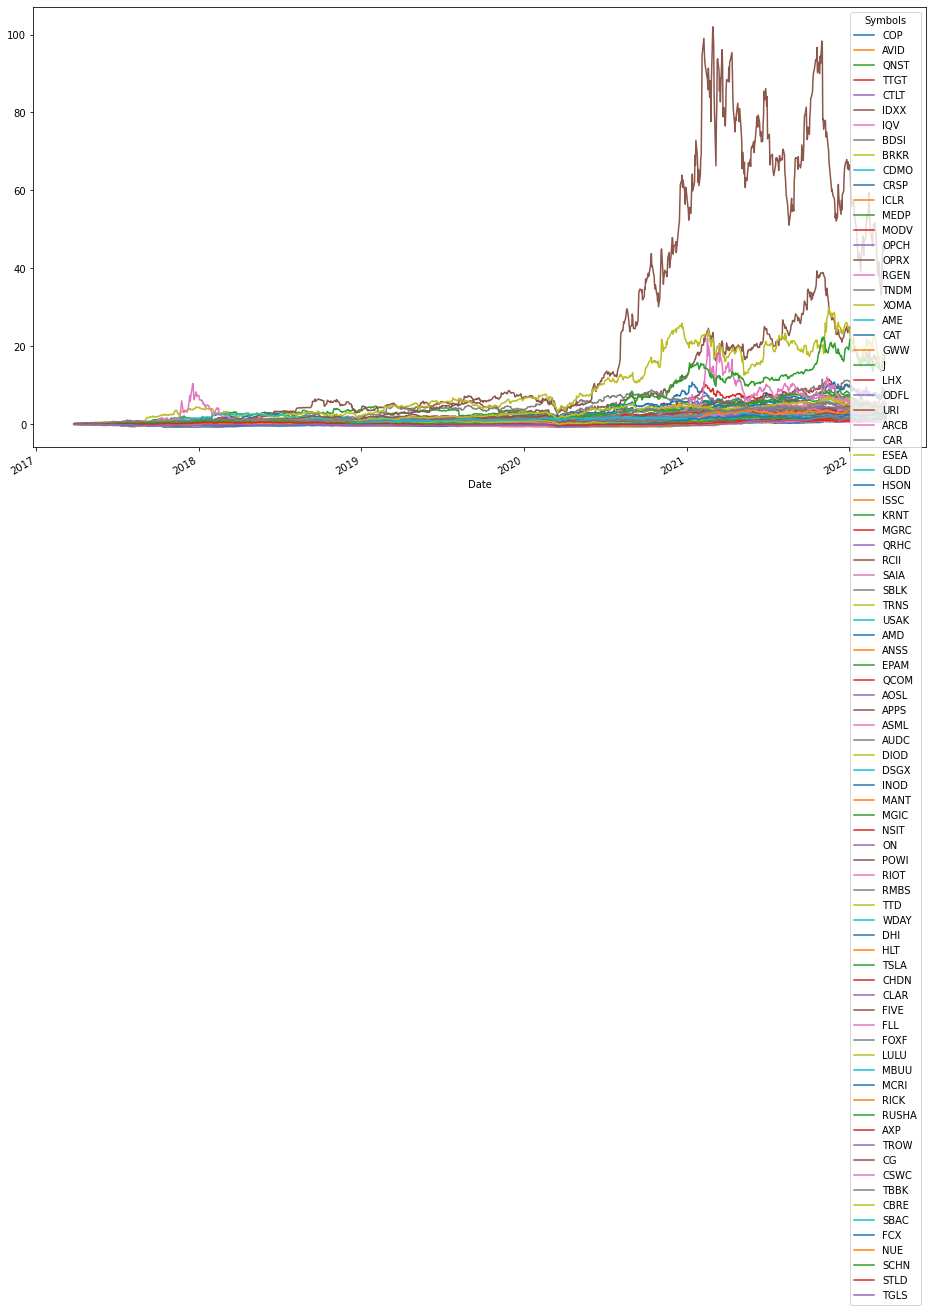

In [167]:
return_series_close.plot(figsize=(16,9))

In [168]:
return_series_close.tail(1)

Symbols,COP,AVID,QNST,TTGT,CTLT,IDXX,IQV,BDSI,BRKR,CDMO,...,CG,CSWC,TBBK,CBRE,SBAC,FCX,NUE,SCHN,STLD,TGLS
Date,,,,,,,,,,,,,,,,,,,,,
2022-03-24,1.370522,6.823405,2.279202,8.29025,2.849804,2.51496,1.880113,2.194286,1.838292,3.410463,...,1.977636,0.424691,4.985714,1.619546,1.750951,3.016393,1.568943,1.825823,1.616111,1.444751


In [169]:
correlation = return_series_close.corr()
# # correlation
# fig, ax = plt.subplots(figsize=(16,10))
# sns.heatmap(correlation, annot = True, ax = ax, cmap="YlGnBu")

In [170]:
correlation = correlation[correlation < 0.2]
correlation.dropna(thresh=1, inplace=True, axis=1)
correlation.dropna(thresh=1, inplace=True, axis=0)

In [171]:
correlation

Symbols,COP,AVID,QNST,TTGT,CTLT,IDXX,IQV,BDSI,BRKR,CDMO,...,RUSHA,TROW,CG,TBBK,SBAC,FCX,NUE,SCHN,STLD,TGLS
Symbols,,,,,,,,,,,,,,,,,,,,,
COP,NaN,NaN,NaN,NaN,0.061987,0.161699,NaN,0.087009,NaN,NaN,...,NaN,NaN,NaN,NaN,-0.007236,NaN,NaN,NaN,NaN,NaN
AVID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.117063,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
QNST,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TTGT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.138772,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CTLT,0.061987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FCX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.038732,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NUE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.083641,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SCHN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.187457,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

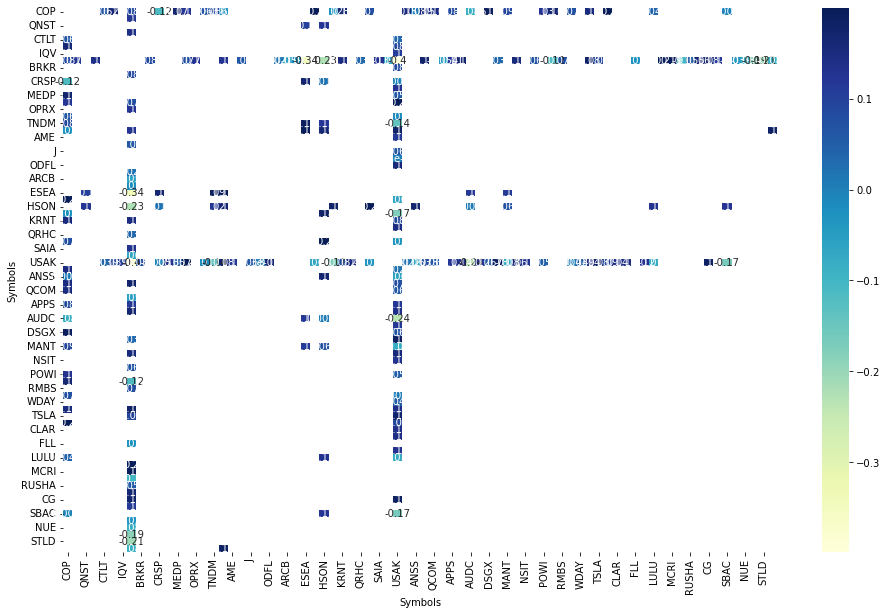

In [172]:
fig, ax = plt.subplots(figsize=(16,10))
sns.heatmap(correlation, annot = True, ax = ax, cmap="YlGnBu")

In [173]:
len(correlation)

78

In [174]:
all_stocks = []
for each in correlation:
    all_stocks.append(each)

In [175]:
len(all_stocks)

78

In [176]:
indexes = []
for i in range(len(final_df_aggressive)):
    each = final_df_aggressive.iloc[i]
    ticker = each["ticker"]
    if ticker in all_stocks:
        indexes.append(i)

In [177]:
final_aggressive_df = final_df_aggressive.iloc[indexes]
final_aggressive_df

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
52,COP,ConocoPhillips,Energy,Increase,Above Fair Price,UnderValued,Not Sustainable,89.27,0.080856,1.177427e+11,...,3.687,-0.0180,11.444871,24.212095,10.774530,34.87,0.216126,0.420681,0.148794,0.651
259,AVID,"Avid Technology, Inc.",Communication Services,Increase,Above Fair Price,UnderValued,No Data,29.93,0.097825,1.347508e+09,...,0.717,0.1500,19.690790,41.743374,14.965000,999.00,0.167502,0.613275,0.402675,0.938
767,QNST,"QuinStreet, Inc.",Communication Services,Increase,Below Fair Price,UnderValued,No Data,10.76,-0.002836,5.836483e+08,...,0.223,0.2500,11.569893,48.251120,11.394409,999.00,0.107938,0.587975,0.269590,0.656
893,TTGT,"TechTarget, Inc.",Communication Services,Increase,Below Fair Price,OverValued,No Data,73.20,0.263308,2.109602e+09,...,0.694,0.3883,28.262548,105.475500,199.319788,999.00,0.127388,0.455710,0.540216,1.137
56,CTLT,"Catalent, Inc.",Healthcare,Increase,Above Fair Price,UnderValued,No Data,97.61,0.171804,1.670966e+10,...,3.177,0.1617,23.240477,30.723953,53.460086,999.00,0.182089,0.359504,0.285814,0.860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,FCX,"Freeport-McMoRan, Inc.",Basic Materials,Increase,Below Fair Price,UnderValued,Not Sustainable,42.74,0.018945,6.276241e+10,...,2.641,0.2890,12.039437,16.183264,59.676070,34.50,0.270827,0.507643,0.234986,0.776
157,NUE,Nucor Corporation,Basic Materials,Increase,Below Fair Price,UnderValued,Not Sustainable,122.64,0.142526,3.505039e+10,...,16.577,0.3499,7.334929,7.398202,259.439419,36.58,0.194245,0.360322,0.193174,0.728
809,SCHN,"Schnitzer Steel Industries, Inc",Basic Materials,Increase,Above Fair Price,UnderValued,No Data,41.58,0.019844,1.156909e+09,...,5.657,0.1000,5.766991,7.350186,13.935037,999.00,0.203970,0.472387,0.156052,0.687
855,STLD,"Steel Dynamics, Inc.",Basic Materials,Increase,Below Fair Price,UnderValued,Not Sustainable,63.23,0.186302,1.254806e+10,...,11.005,0.3632,5.062450,5.745570,146.099525,34.29,0.202754,0.411506,0.159118,0.674


In [178]:
final_aggressive_df.to_csv("selected_stocks_aggressive_v3.csv")